First, create a new conda environment named BI2025 and install the required packages from requirements.txt


In [71]:
# !conda create -n BI2025 python=3.11 -y
# !conda activate BI2025
!pip install -r requirements.txt

  Cloning https://github.com/AllStarsAT/starvers.git to c:\users\ibrar\appdata\local\temp\pip-install-rvyu6jb8\starvers_7250ded9696842d0b7bc832fba0e8869
  Resolved https://github.com/AllStarsAT/starvers.git to commit 5e6e112e2b37cb5a27af9585bd572d27187ef735
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/AllStarsAT/starvers.git 'C:\Users\ibrar\AppData\Local\Temp\pip-install-rvyu6jb8\starvers_7250ded9696842d0b7bc832fba0e8869'


In [72]:
# DO NOT MODIFY OR COPY THIS CELL!! 
# Note: The only imports allowed are Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import typing
import requests
import time
import shutil
import json
from starvers.starvers import TripleStoreEngine

## Graph-based documentation preliminaries

**!!!IMPORTANT!!!**

Everytime you work on this notebook, enter your student ID in the `executed_by` variable so that the cell executions are accredited to you.

In [73]:
executed_by ='stud-id_12350094'  # Replace the digits after "id_" with your own student ID

Set your group and student IDs. Do this only once.

In [74]:
# group id for this project
group_id = '16'  # Replace the digits with your group id

# Students working on this notebook
student_a = 'stud-id_12350094'  # Replace the digits after "id_" with student A's student ID
student_b = 'stud-id_11826186'  # Replace the digits after "id_" with student B's student ID

In [75]:
# Roles. Don't change these values.
code_writer_role = 'code_writer'
code_executor_role = 'code_executor'

Setup the starvers API for logging your steps into our server-sided graph database.

In [76]:
get_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025"
post_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025/statements"
engine = TripleStoreEngine(get_endpoint, post_endpoint, skip_connection_test=True)

Use these prefixes in your notebooks. You can extend this dict with your prefixes of additional ontologies that you use in this notebook. Replace 00 with your group id

In [77]:
prefixes = {
    'xsd': 'http://www.w3.org/2001/XMLSchema#',
    'rdfs': 'http://www.w3.org/2000/01/rdf-schema#',
    'foaf': 'http://xmlns.com/foaf/0.1/',
    'prov': 'http://www.w3.org/ns/prov#',
    'sc': 'https://schema.org/',
    'cr': 'http://mlcommons.org/croissant/',
    'mls': 'http://www.w3.org/ns/mls#',
    'mlso': 'http://w3id.org/mlso',
    'siu': 'https://si-digital-framework.org/SI/units/',
    'siq': 'https://si-digital-framework.org/SI/quantities/',
    'qudt': 'http://qudt.org/schema/qudt/',
    '': f'https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/',
}

prefix_header = '\n'.join([f'PREFIX {k}: <{v}>' for k, v in prefixes.items()]) + '\n\n'

Ontologies to use
* Provenance of the experiment process
    * PROV-O: 
        * doc: https://www.w3.org/TR/prov-o/
        * serialization: https://www.w3.org/ns/prov-o
* Data used and created
    * schema.org - Dataset: 
        * doc: https://schema.org/Dataset
        * serialization: https://schema.org/version/latest/schemaorg-current-https.ttl
    * Crossaint
        * doc: https://docs.mlcommons.org/croissant/docs/croissant-spec.html
        * serialization: https://github.com/mlcommons/croissant/blob/main/docs/croissant.ttl
* ML experiments performed
    * MLSO: 
        * doc: https://github.com/dtai-kg/MLSO
        * doc: https://dtai-kg.github.io/MLSO/#http://w3id.org/
        * serialization: https://dtai-kg.github.io/MLSO/ontology.ttl
* Measurements, Metrics, Units
    * QUDT
        * doc:https://qudt.org/
        * doc: https://github.com/qudt/qudt-public-repo
        * serialization: https://github.com/qudt/qudt-public-repo/blob/main/src/main/rdf/schema/SCHEMA_QUDT.ttl
    * SI Digital Framework
        * doc: https://github.com/TheBIPM/SI_Digital_Framework/blob/main/SI_Reference_Point/docs/README.md
        * doc: https://si-digital-framework.org/
        * doc: https://si-digital-framework.org/SI
        * serialization: https://github.com/TheBIPM/SI_Digital_Framework/blob/main/SI_Reference_Point/TTL/si.ttl
    * Quantities and Units
        * doc: https://www.omg.org/spec/Commons
        * serialization: https://www.omg.org/spec/Commons/QuantitiesAndUnits.ttl

Use this function to record execution times.

In [78]:
def now() -> str:
    """
    Returns the current time in ISO 8601 format with UTC timezone in the following format:
    YYYY-MM-DDTHH:MM:SS.sssZ
    """
    timestamp = datetime.datetime.now(datetime.timezone.utc)
    timestamp_formated = timestamp.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]  +"Z"

    return timestamp_formated

Register yourself in the Knowledge Graph using ProvO. Change the given name, family name and immatriculation number to reflect your own data.

In [79]:
# Ontologies used: foaf, prov, IAO
reigstration_triples_a = [
f':{student_a} rdf:type foaf:Person .',
f':{student_a} rdf:type prov:Agent .',
f':{student_a} foaf:givenName "Muhammad" .',
f':{student_a} foaf:familyName "Ibrar" .',
f':{student_a} <http://vivoweb.org/ontology/core#identifier> :{student_a} .',
f':{student_a} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_a} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_a} <http://purl.obolibrary.org/obo/IAO_0000219> "12350094"^^xsd:string .',
]

reigstration_triples_b = [
f':{student_b} rdf:type foaf:Person .',
f':{student_b} rdf:type prov:Agent .',
f':{student_b} foaf:givenName "Ahmad" .',
f':{student_b} foaf:familyName "Ibrahim" .',
f':{student_b} <http://vivoweb.org/ontology/core#identifier> :{student_b} .',
f':{student_b} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_b} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_b} <http://purl.obolibrary.org/obo/IAO_0000219> "11826186"^^xsd:string .',
]

role_triples = [
    f':{code_writer_role} rdf:type prov:Role .',
    f':{code_executor_role} rdf:type prov:Role .',
]


engine.insert(reigstration_triples_a, prefixes=prefixes)
engine.insert(reigstration_triples_b, prefixes=prefixes)
engine.insert(role_triples, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

**What not do do**

Do not use [blank nodes](https://www.w3.org/wiki/BlankNodes).

PROV-O uses blank nodes to connect multiple elements with each other.
Such blank nodes (such as _:association) should not be used.
Instead, assign a fixed node ID such as
:5119fcd7-b571-41e0-9464-a37c7be0f574 by generating them outside of the
notebook.
We suggest that, for each setting where such a blank node is needed to
connect multiple elements, you create a unique hash (using uuid.uuid4())
and keep this as hard-coded identifier for the blank node. The template
notebook contains examples of this. Do *not* use these provided values,
as otherwise, your provenance documentations will all be connected via
these identifiers!
Also, do not generate them dynamically in every cell execution, e.g. by
using uuid.uuid4() in a cell. This would generate many new linking nodes
for connecting the same elements.
Compute one for each node (cell) where you need them and make sure to
use the same one on each re-execution of the notebook.

In [80]:
# weather_data_path = os.path.join("data", "datasets", "weather")
# cyclists_data_path = os.path.join("data", "datasets", "cyclists")
mobile_price_data_path = os.path.join("data", "datasets", "mobile_price")


## Business Understanding 

In [81]:
## Each Activity that follows is part of the Business Understanding Phase

business_understanding_phase_executor = [
f':business_understanding_phase rdf:type prov:Activity .',
f':business_understanding_phase rdfs:label "Business Understanding Phase" .', ## Phase 1: Business Understanding
]
engine.insert(business_understanding_phase_executor, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [82]:
#############################################
# Documentation
#############################################

data_src_and_scenario_comment = """
Data Source:
The dataset is the Kaggle “Mobile Price Classification” dataset containing 2,000 mobile phones. Each phone is described by 20 technical features (battery power, RAM, internal memory, camera specs, connectivity options, screen dimensions, etc.) and one target variable price_range with four classes (0 = low, 3 = very high).

Scenario:
A new mobile company wants to price upcoming phone models competitively against major brands. Instead of relying only on expert judgment, the company wants to analyze historical specifications of phones and their corresponding price ranges to support pricing decisions.
"""

business_objectives_comment = """
1. Support pricing decisions by predicting the most suitable price range for new phone models.
2. Reduce manual effort and time required to estimate price categories.
3. Improve product positioning in budget, mid-range, high-end, and flagship segments.
4. Increase transparency on how technical features influence pricing decisions.
"""

business_success_criteria_comment = """
1. The ML system is regularly used by product and pricing teams.
2. At least a 30% reduction in time needed for initial price-range estimation.
3. Most new models (>80%) remain in the initially selected price band after launch.
4. Pricing decisions become more consistent and data-driven across phone segments.
"""

data_mining_goals_comment = """
1. Build a multi-class classifier predicting the price_range (0-3) from 20 phone features.
2. Achieve robust accuracy on unseen data and generalize well to new configurations.
3. Identify important features (e.g., RAM, pixel resolution) influencing the price range.
4. Provide probability outputs to support uncertainty-aware pricing decisions.
"""

data_mining_success_criteria_comment = """
1. Achieve ≥90% accuracy on the validation/test set.
2. Macro F1-score ≥0.88 with no class having recall <0.80.
3. Model performance remains stable across different random splits.
4. Probabilities are reasonably calibrated for business decision use.
"""

ai_risk_aspects_comment = """
1. Misclassification may lead to wrong pricing decisions, affecting revenue or sales.
2. The dataset may not reflect future devices; model drift is a risk.
3. Over-reliance on the model could cause poor decisions without expert review.
4. Although no personal data is used, systematic bias across device categories is possible.
5. Pricing logic leakage is a business security risk if the model is exposed externally.
"""


bu_ass_uuid_executor = "79fd346c-c772-4e8c-92d8-583c5a1666ad" # Generate once
business_understanding_executor = [
f':business_understanding rdf:type prov:Activity .',
f':business_understanding sc:isPartOf :business_understanding_phase .', # Connect Activity to Parent Business Understanding Phase Activity
f':business_understanding prov:qualifiedAssociation :{bu_ass_uuid_executor} .',
f':{bu_ass_uuid_executor} prov:agent :{executed_by} .',
f':{bu_ass_uuid_executor} rdf:type prov:Association .',
f':{bu_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(business_understanding_executor, prefixes=prefixes)


business_understanding_data_executor = [
# 1a
f':bu_data_source_and_scenario rdf:type prov:Entity .',
f':bu_data_source_and_scenario prov:wasGeneratedBy :business_understanding .',
f':bu_data_source_and_scenario rdfs:label "1a Data Source and Scenario" .',
f':bu_data_source_and_scenario rdfs:comment """{data_src_and_scenario_comment}""" .',
# 1b
f':bu_business_objectives rdf:type prov:Entity .',
f':bu_business_objectives prov:wasGeneratedBy :business_understanding .',
f':bu_business_objectives rdfs:label "1b Business Objectives" .',
f':bu_business_objectives rdfs:comment """{business_objectives_comment}""" .',
# 1c
f':bu_business_success_criteria rdf:type prov:Entity .',
f':bu_business_success_criteria prov:wasGeneratedBy :business_understanding .',
f':bu_business_success_criteria rdfs:label "1c Business Success Criteria" .',
f':bu_business_success_criteria rdfs:comment """{business_success_criteria_comment}""" .',
# 1d
f':bu_data_mining_goals rdf:type prov:Entity .',
f':bu_data_mining_goals prov:wasGeneratedBy :business_understanding .',
f':bu_data_mining_goals rdfs:label "1d Data Mining Goals" .',
f':bu_data_mining_goals rdfs:comment """{data_mining_goals_comment}""" .',
# 1e
f':bu_data_mining_success_criteria rdf:type prov:Entity .',
f':bu_data_mining_success_criteria prov:wasGeneratedBy :business_understanding .',
f':bu_data_mining_success_criteria rdfs:label "1e Data Mining Success Criteria" .',
f':bu_data_mining_success_criteria rdfs:comment """{data_mining_success_criteria_comment}""" .',
# 1f
f':bu_ai_risk_aspects rdf:type prov:Entity .',
f':bu_ai_risk_aspects prov:wasGeneratedBy :business_understanding .',
f':bu_ai_risk_aspects rdfs:label "1f AI risk aspects" .',
f':bu_ai_risk_aspects rdfs:comment """{ai_risk_aspects_comment}""" .',

]
engine.insert(business_understanding_data_executor, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

## Data Understanding

The following pseudo-code & pseudo-documentation may be used as a hint.

In [83]:
## Each Activity that follows is part of the Data Understanding Phase

business_understanding_phase_executor = [
f':data_understanding_phase rdf:type prov:Activity .',
f':data_understanding_phase rdfs:label "Data Understanding Phase" .', 
]
engine.insert(business_understanding_phase_executor, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [84]:
data_path  = os.path.join("data", "datasets", "mobile_price")
load_mobile_data_code_writer = student_a
def load_mobile_data()-> pd.DataFrame:

    ### Load your data
    input_file = os.path.join(data_path, 'train.csv')
    df = pd.read_csv(input_file)
    return df

start_time_ld = now()
data = load_mobile_data()
end_time_ld = now()

display(data.head())

#############################################
# Documentation
#############################################

# Now document the raw data and the loaded data using appropriate ontologies.

# Always add these triples for every activity to define the executor!
ld_ass_uuid_executor = "ceb5c10f-749f-486b-b3c0-19ce82a2e393"  # Generate once
load_mobile_data_executor = [
    f':load_mobile_data prov:qualifiedAssociation :{ld_ass_uuid_executor} .',
    f':{ld_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{ld_ass_uuid_executor} rdf:type prov:Association .',
    f':{ld_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(load_mobile_data_executor, prefixes=prefixes)

ld_ass_uuid_writer = "b231c4fc-9670-4126-88aa-2b051acea6ac"  # Generate once
ld_report = """
Load the mobile price classification training data from train.csv and create
a pandas DataFrame with 2000 rows and 21 columns (20 features + 1 target price_range).
"""

load_mobile_data_activity = [
    # Activity itself
    ':load_mobile_data rdf:type prov:Activity .',
    ':load_mobile_data sc:isPartOf :data_understanding_phase .',
    ':load_mobile_data rdfs:comment "Data Understanding" .',
    f':load_mobile_data rdfs:comment """{ld_report}""" .',
    f':load_mobile_data prov:startedAtTime "{start_time_ld}"^^xsd:dateTime .',
    f':load_mobile_data prov:endedAtTime "{end_time_ld}"^^xsd:dateTime .',

    # Code writer association
    f':load_mobile_data prov:qualifiedAssociation :{ld_ass_uuid_writer} .',
    f':{ld_ass_uuid_writer} prov:agent :{load_mobile_data_code_writer} .',
    f':{ld_ass_uuid_writer} rdf:type prov:Association .',
    f':{ld_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # INPUT of activity
    ':load_mobile_data prov:used :raw_data .',
    ':load_mobile_data prov:used :raw_data_path .',
    ':raw_data rdf:type prov:Entity .',
    ':raw_data_path rdf:type prov:Entity .',
    ':raw_data prov:wasDerivedFrom :raw_data_path .',

    # OUTPUT of activity
    ':data rdf:type prov:Entity .',
    ':data prov:wasGeneratedBy :load_mobile_data .',
    ':data prov:wasDerivedFrom :raw_data .',
]
engine.insert(load_mobile_data_activity, prefixes=prefixes)

# Further describe the raw data using Croissant
raw_data_triples = [
    # Dataset level
    ':raw_data rdf:type sc:Dataset .',
    ':raw_data sc:name "Mobile Price Classification dataset (raw)" .',
    ':raw_data sc:description "Kaggle mobile phone specifications with price_range labels (0–3) for 2000 phones." .',

    # File / distribution
    ':mobile_price_csv rdf:type cr:FileObject .',
    ':mobile_price_csv sc:name "train.csv" .',
    ':mobile_price_csv sc:encodingFormat "text/csv" .',
    ':raw_data sc:distribution :mobile_price_csv .',

    # RecordSet describing the tabular structure
    ':raw_recordset rdf:type cr:RecordSet .',
    ':raw_recordset sc:name "Table of mobile phone specifications and price range" .',
    ':raw_recordset cr:source :mobile_price_csv .',
    ':raw_data cr:recordSet :raw_recordset .',

    # === Fields: one entry per column in df.info() ===

    # 0 battery_power
    ':raw_recordset cr:field :field_battery_power .',
    ':field_battery_power rdf:type cr:Field .',
    ':field_battery_power sc:name "battery_power" .',
    ':field_battery_power sc:description "Total energy the battery can store in one charge (mAh)." .',
    ':field_battery_power cr:dataType xsd:integer .',

    # 1 blue
    ':raw_recordset cr:field :field_blue .',
    ':field_blue rdf:type cr:Field .',
    ':field_blue sc:name "blue" .',
    ':field_blue sc:description "Binary indicator (0/1) whether the phone has Bluetooth support." .',
    ':field_blue cr:dataType xsd:integer .',

    # 2 clock_speed
    ':raw_recordset cr:field :field_clock_speed .',
    ':field_clock_speed rdf:type cr:Field .',
    ':field_clock_speed sc:name "clock_speed" .',
    ':field_clock_speed sc:description "Maximum clock speed of the microprocessor (GHz)." .',
    ':field_clock_speed cr:dataType xsd:double .',

    # 3 dual_sim
    ':raw_recordset cr:field :field_dual_sim .',
    ':field_dual_sim rdf:type cr:Field .',
    ':field_dual_sim sc:name "dual_sim" .',
    ':field_dual_sim sc:description "Binary indicator (0/1) whether the phone supports dual SIM." .',
    ':field_dual_sim cr:dataType xsd:integer .',

    # 4 fc
    ':raw_recordset cr:field :field_fc .',
    ':field_fc rdf:type cr:Field .',
    ':field_fc sc:name "fc" .',
    ':field_fc sc:description "Front camera resolution in megapixels." .',
    ':field_fc cr:dataType xsd:integer .',

    # 5 four_g
    ':raw_recordset cr:field :field_four_g .',
    ':field_four_g rdf:type cr:Field .',
    ':field_four_g sc:name "four_g" .',
    ':field_four_g sc:description "Binary indicator (0/1) whether the phone supports 4G." .',
    ':field_four_g cr:dataType xsd:integer .',

    # 6 int_memory
    ':raw_recordset cr:field :field_int_memory .',
    ':field_int_memory rdf:type cr:Field .',
    ':field_int_memory sc:name "int_memory" .',
    ':field_int_memory sc:description "Internal memory size of the phone (in GB)." .',
    ':field_int_memory cr:dataType xsd:integer .',

    # 7 m_dep
    ':raw_recordset cr:field :field_m_dep .',
    ':field_m_dep rdf:type cr:Field .',
    ':field_m_dep sc:name "m_dep" .',
    ':field_m_dep sc:description "Mobile depth (thickness) in cm." .',
    ':field_m_dep cr:dataType xsd:double .',

    # 8 mobile_wt
    ':raw_recordset cr:field :field_mobile_wt .',
    ':field_mobile_wt rdf:type cr:Field .',
    ':field_mobile_wt sc:name "mobile_wt" .',
    ':field_mobile_wt sc:description "Weight of the mobile phone in grams." .',
    ':field_mobile_wt cr:dataType xsd:integer .',

    # 9 n_cores
    ':raw_recordset cr:field :field_n_cores .',
    ':field_n_cores rdf:type cr:Field .',
    ':field_n_cores sc:name "n_cores" .',
    ':field_n_cores sc:description "Number of cores of the processor (1–8)." .',
    ':field_n_cores cr:dataType xsd:integer .',

    # 10 pc
    ':raw_recordset cr:field :field_pc .',
    ':field_pc rdf:type cr:Field .',
    ':field_pc sc:name "pc" .',
    ':field_pc sc:description "Primary camera resolution in megapixels." .',
    ':field_pc cr:dataType xsd:integer .',

    # 11 px_height
    ':raw_recordset cr:field :field_px_height .',
    ':field_px_height rdf:type cr:Field .',
    ':field_px_height sc:name "px_height" .',
    ':field_px_height sc:description "Pixel resolution height of the mobile display." .',
    ':field_px_height cr:dataType xsd:integer .',

    # 12 px_width
    ':raw_recordset cr:field :field_px_width .',
    ':field_px_width rdf:type cr:Field .',
    ':field_px_width sc:name "px_width" .',
    ':field_px_width sc:description "Pixel resolution width of the mobile display." .',
    ':field_px_width cr:dataType xsd:integer .',

    # 13 ram
    ':raw_recordset cr:field :field_ram .',
    ':field_ram rdf:type cr:Field .',
    ':field_ram sc:name "ram" .',
    ':field_ram sc:description "Random Access Memory size in MB." .',
    ':field_ram cr:dataType xsd:integer .',

    # 14 sc_h
    ':raw_recordset cr:field :field_sc_h .',
    ':field_sc_h rdf:type cr:Field .',
    ':field_sc_h sc:name "sc_h" .',
    ':field_sc_h sc:description "Screen height of the mobile in cm." .',
    ':field_sc_h cr:dataType xsd:integer .',

    # 15 sc_w
    ':raw_recordset cr:field :field_sc_w .',
    ':field_sc_w rdf:type cr:Field .',
    ':field_sc_w sc:name "sc_w" .',
    ':field_sc_w sc:description "Screen width of the mobile in cm." .',
    ':field_sc_w cr:dataType xsd:integer .',

    # 16 talk_time
    ':raw_recordset cr:field :field_talk_time .',
    ':field_talk_time rdf:type cr:Field .',
    ':field_talk_time sc:name "talk_time" .',
    ':field_talk_time sc:description "Longest time that a single battery charge will last during continuous calls (hours)." .',
    ':field_talk_time cr:dataType xsd:integer .',

    # 17 three_g
    ':raw_recordset cr:field :field_three_g .',
    ':field_three_g rdf:type cr:Field .',
    ':field_three_g sc:name "three_g" .',
    ':field_three_g sc:description "Binary indicator (0/1) whether the phone supports 3G." .',
    ':field_three_g cr:dataType xsd:integer .',

    # 18 touch_screen
    ':raw_recordset cr:field :field_touch_screen .',
    ':field_touch_screen rdf:type cr:Field .',
    ':field_touch_screen sc:name "touch_screen" .',
    ':field_touch_screen sc:description "Binary indicator (0/1) whether the phone has a touch screen." .',
    ':field_touch_screen cr:dataType xsd:integer .',

    # 19 wifi
    ':raw_recordset cr:field :field_wifi .',
    ':field_wifi rdf:type cr:Field .',
    ':field_wifi sc:name "wifi" .',
    ':field_wifi sc:description "Binary indicator (0/1) whether the phone supports WiFi." .',
    ':field_wifi cr:dataType xsd:integer .',

    # 20 price_range (target)
    ':raw_recordset cr:field :field_price_range .',
    ':field_price_range rdf:type cr:Field .',
    ':field_price_range sc:name "price_range" .',
    ':field_price_range sc:description "Target: price category of the mobile (0=low, 1=medium, 2=high, 3=very high)." .',
    ':field_price_range cr:dataType xsd:integer .',
]
engine.insert(raw_data_triples, prefixes=prefixes)

# Also the output of the load activity is a dataset that can be described with Croissant
data_triples = [
    ':data rdf:type sc:Dataset .',
    ':data sc:name "Loaded mobile price classification data" .',
    ':data sc:description "In-memory pandas DataFrame with 2000 rows and 21 columns (20 features + 1 target price_range)." .',

    ':recordset rdf:type cr:RecordSet .',
    ':recordset sc:name "Mobile price DataFrame recordset" .',
    ':data cr:recordSet :recordset .',

    # Reuse the same Field individuals for the loaded data
    ':recordset cr:field :field_battery_power .',
    ':recordset cr:field :field_blue .',
    ':recordset cr:field :field_clock_speed .',
    ':recordset cr:field :field_dual_sim .',
    ':recordset cr:field :field_fc .',
    ':recordset cr:field :field_four_g .',
    ':recordset cr:field :field_int_memory .',
    ':recordset cr:field :field_m_dep .',
    ':recordset cr:field :field_mobile_wt .',
    ':recordset cr:field :field_n_cores .',
    ':recordset cr:field :field_pc .',
    ':recordset cr:field :field_px_height .',
    ':recordset cr:field :field_px_width .',
    ':recordset cr:field :field_ram .',
    ':recordset cr:field :field_sc_h .',
    ':recordset cr:field :field_sc_w .',
    ':recordset cr:field :field_talk_time .',
    ':recordset cr:field :field_three_g .',
    ':recordset cr:field :field_touch_screen .',
    ':recordset cr:field :field_wifi .',
    ':recordset cr:field :field_price_range .',
]
engine.insert(data_triples, prefixes=prefixes)

# Also add the units to some fields (example usage of QUDT/SI units)
units_triples = [
    # Battery power in mAh – treated as a kind of counting/energy-related unit
    ':field_battery_power qudt:unit qudt:CountingUnit .',

    # RAM and internal memory – information capacity
    ':field_ram qudt:unit qudt:InformationUnit .',
    ':field_int_memory qudt:unit qudt:InformationUnit .',

    # Screen dimensions and depth – lengths in cm
    ':field_sc_h qudt:unit siu:centiMeter .',
    ':field_sc_w qudt:unit siu:centiMeter .',
    ':field_m_dep qudt:unit siu:centiMeter .',

    # Weight in grams
    ':field_mobile_wt qudt:unit siu:gram .',

    # Talk time in hours
    ':field_talk_time qudt:unit siu:hour .',

    # Pixel resolution – we treat as a counting unit
    ':field_px_height qudt:unit qudt:CountingUnit .',
    ':field_px_width qudt:unit qudt:CountingUnit .',

    # Camera megapixels – also counting-like
    ':field_fc qudt:unit qudt:CountingUnit .',
    ':field_pc qudt:unit qudt:CountingUnit .',

    # Number of cores – plain count
    ':field_n_cores qudt:unit qudt:CountingUnit .',

    # Binary flags and class label – counts / dimensionless
    ':field_blue qudt:unit qudt:DimensionlessUnit .',
    ':field_dual_sim qudt:unit qudt:DimensionlessUnit .',
    ':field_four_g qudt:unit qudt:DimensionlessUnit .',
    ':field_three_g qudt:unit qudt:DimensionlessUnit .',
    ':field_touch_screen qudt:unit qudt:DimensionlessUnit .',
    ':field_wifi qudt:unit qudt:DimensionlessUnit .',
    ':field_price_range qudt:unit qudt:DimensionlessUnit .',
]
engine.insert(units_triples, prefixes=prefixes)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

**Continue with other tasks of the Data Understanding phase such as checking the distribution, skewness, plausibility of values, etc...**

In [85]:
#############################################
# Data Understanding – Summary of Variables
#############################################

du_summary_code_writer = student_a

# --- Compute categorical and numerical summaries ---
start_time_du = now()

df_categorical = data[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)
df_numerical = data.drop(columns=df_categorical.columns)

categorical_summary = pd.DataFrame({
    'Number of Unique Values': df_categorical.nunique(),
    'Unique Values': df_categorical.apply(lambda x: x.unique())
})

numerical_summary = df_numerical.describe().T.round(2)

end_time_du = now()

display(categorical_summary)
display(numerical_summary)

#############################################
# Provenance Documentation
#############################################

du_ass_uuid_executor = "75572bcb-4210-499f-9b34-783657b43f2c"

du_summary_executor = [
    f':du_summary prov:qualifiedAssociation :{du_ass_uuid_executor} .',
    f':{du_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{du_ass_uuid_executor} rdf:type prov:Association .',
    f':{du_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(du_summary_executor, prefixes=prefixes)

du_ass_uuid_writer = "031f9295-0680-462e-8e37-4e096b5512f2"

du_summary_comment = """
We examined the dataset structure by separating categorical and numerical variables.
Categorical features (blue, dual_sim, three_g, four_g, etc.) show mostly binary distributions.
The target price_range is evenly distributed across its four classes (0-3), confirming a balanced dataset.
Numerical variables (battery_power, ram, px_width, px_height, etc.) show plausible ranges and no missing values.
This summary provides an initial understanding of feature types and their variability.
"""

du_summary_activity = [
    ':du_summary rdf:type prov:Activity .',
    ':du_summary sc:isPartOf :data_understanding_phase .',
    f':du_summary rdfs:comment """{du_summary_comment}""" .',
    f':du_summary prov:startedAtTime "{start_time_du}"^^xsd:dateTime .',
    f':du_summary prov:endedAtTime "{end_time_du}"^^xsd:dateTime .',
    f':du_summary prov:qualifiedAssociation :{du_ass_uuid_writer} .',
    f':{du_ass_uuid_writer} prov:agent :{du_summary_code_writer} .',
    f':{du_ass_uuid_writer} rdf:type prov:Association .',
    f':{du_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Outputs
    ':categorical_summary rdf:type prov:Entity .',
    f':categorical_summary rdfs:comment """{categorical_summary.to_string()}""" .',
    ':categorical_summary prov:wasGeneratedBy :du_summary .',

    ':numerical_summary rdf:type prov:Entity .',
    f':numerical_summary rdfs:comment """{numerical_summary.to_string()}""" .',
    ':numerical_summary prov:wasGeneratedBy :du_summary .',
]
engine.insert(du_summary_activity, prefixes=prefixes)


,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.52,439.42,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52,0.82,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.31,4.34,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.05,18.15,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50,0.29,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.25,35.40,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.92,6.06,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.11,443.78,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.52,432.20,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21,1084.73,256.0,1207.50,2146.5,3064.50,3998.0


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#############################################
# Data Understanding – Categorical Distributions
#############################################

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import colors

catdist_code_writer = student_a
start_time_catdist = now()

# --- Create Figure ---
fig = make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}]*3]*3,
                    vertical_spacing=0.05, horizontal_spacing=0.01)

for i, feature in enumerate(df_categorical.columns):
    value_counts = df_categorical[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()
  
    cmap = colors.LinearSegmentedColormap.from_list("purple_contrast", ["#6A0DAD", "white"])
    
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    pie_chart = go.Pie(labels=labels, values=values,
                       marker=dict(colors=color_list, line=dict(color='white', width=2)),
                       textinfo='percent+label', title=feature)

    if i < 8:
        fig.add_trace(pie_chart, row=i//3 + 1, col=i%3 + 1)

fig.update_layout(title="Distribution of Categorical Variables", height=900, width=900, showlegend=False)
fig.show()

end_time_catdist = now()

#############################################
# Provenance Documentation
#############################################

catdist_ass_uuid_executor = "f9fb94db-c9c1-42b0-995b-6addac491af3"

catdist_executor = [
    f':categorical_distribution prov:qualifiedAssociation :{catdist_ass_uuid_executor} .',
    f':{catdist_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{catdist_ass_uuid_executor} rdf:type prov:Association .',
    f':{catdist_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(catdist_executor, prefixes=prefixes)

catdist_ass_uuid_writer = "a2007472-d950-437f-8608-9e6ee79b8816"

catdist_comment = """
Plotted pie-chart distributions for all categorical variables.
The price_range classes are evenly distributed (500 samples each).
Binary features such as blue, dual_sim, four_g, three_g, wifi, and touch_screen
display expected near-even splits, except three_g which shows ~76% phones supporting 3G.
These visualizations help assess class balance and detect unusual category frequencies.
"""

catdist_activity = [
    ':categorical_distribution rdf:type prov:Activity .',
    ':categorical_distribution sc:isPartOf :data_understanding_phase .',
    f':categorical_distribution rdfs:comment """{catdist_comment}""" .',
    f':categorical_distribution prov:startedAtTime "{start_time_catdist}"^^xsd:dateTime .',
    f':categorical_distribution prov:endedAtTime "{end_time_catdist}"^^xsd:dateTime .',
    f':categorical_distribution prov:qualifiedAssociation :{catdist_ass_uuid_writer} .',
    f':{catdist_ass_uuid_writer} prov:agent :{catdist_code_writer} .',
    f':{catdist_ass_uuid_writer} rdf:type prov:Association .',
    f':{catdist_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Output entity
    ':categorical_distribution_output rdf:type prov:Entity .',
    ':categorical_distribution_output rdfs:comment "Plot showing categorical variable distribution." .',
    ':categorical_distribution_output prov:wasGeneratedBy :categorical_distribution .'
]
engine.insert(catdist_activity, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
import seaborn as sns

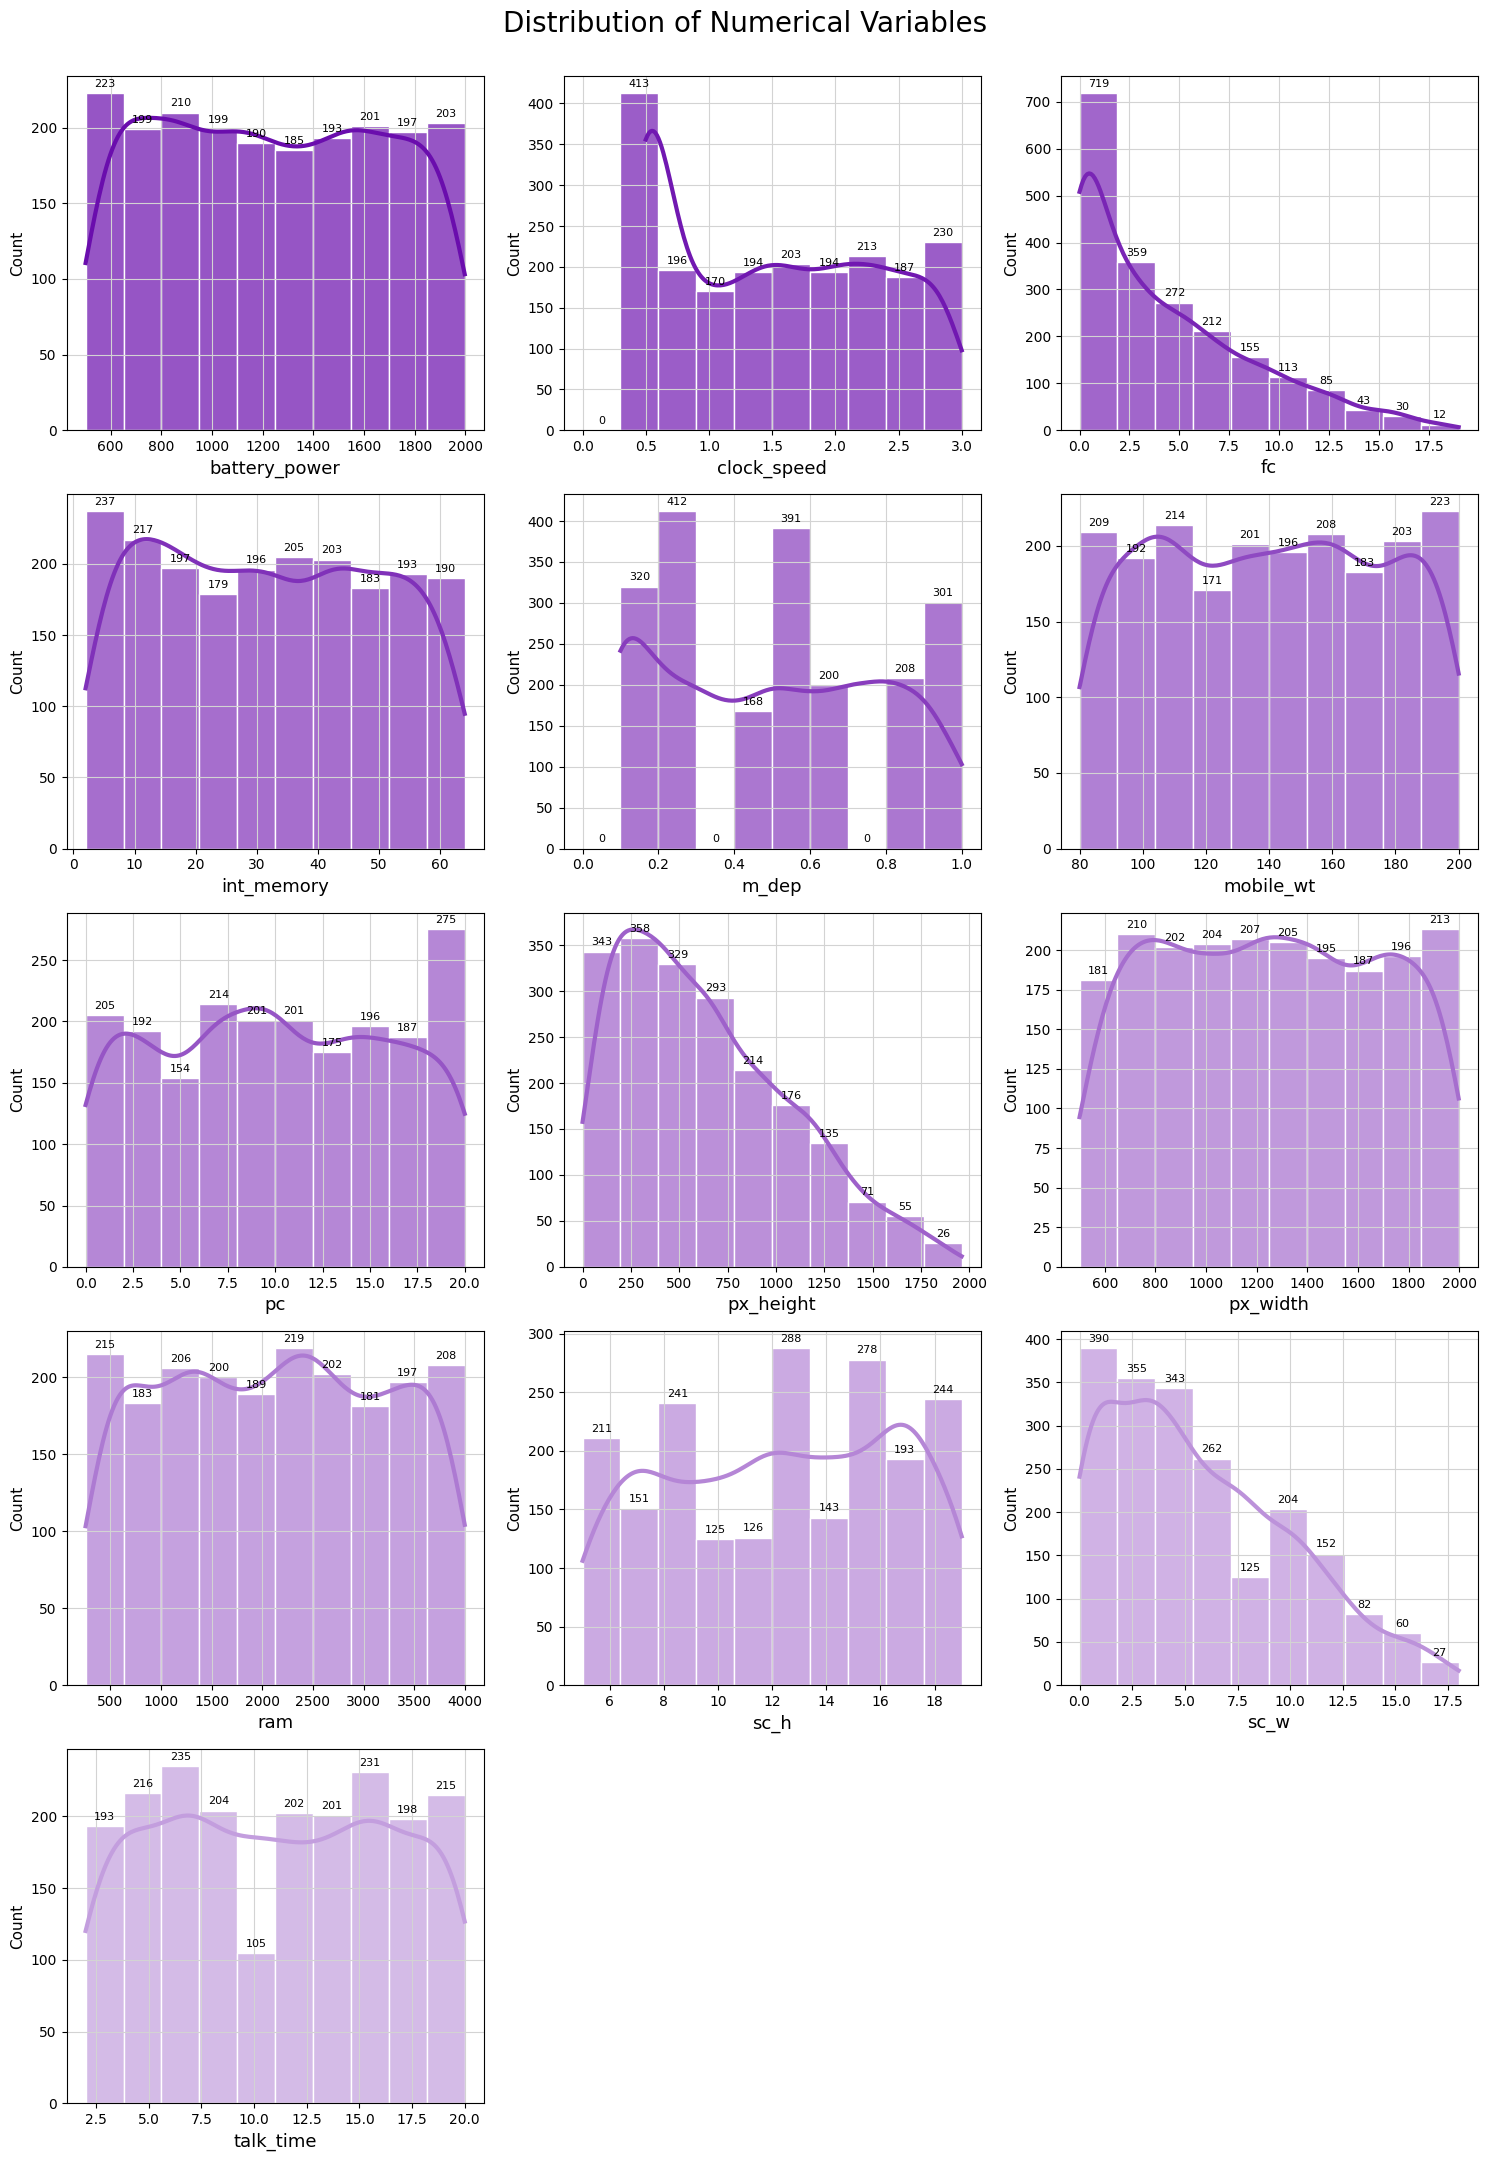

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Understanding – Numerical Distributions & Skewness
#############################################

numdist_code_writer = student_a
start_time_numdist = now()

# Create custom colormap
cmap = colors.LinearSegmentedColormap.from_list("purple_contrast", ["#6A0DAD", "white"])

# A helper function to generate consistent purple shades
def get_color(index, total=20):
    norm = colors.Normalize(vmin=0, vmax=total)
    return colors.rgb2hex(cmap(norm(index)))

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,22))

skewness_report = {}

for i, col in enumerate(df_numerical.columns):
    x = i // 3
    y = i % 3

    # Precompute histogram bin ranges
    values, bins = np.histogram(
        df_numerical[col],
        range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max()))
    )

    # Plot histogram
    graph = sns.histplot(
        df_numerical[col],
        bins=bins,
        kde=True,
        ax=ax[x, y],
        color=get_color(i),
        alpha=0.7,
        edgecolor='white',
        line_kws={'lw': 3, 'color': '#6A0DAD'}
    )
    
    # Add count labels on top of the bars
    for container in graph.containers:
        ax[x, y].bar_label(container, fmt='%d', padding=3, fontsize=8) # fmt='%d' ensures integer counts

    ax[x, y].set_xlabel(col, fontsize=13)
    ax[x, y].set_ylabel('Count', fontsize=11)
    ax[x, y].grid(color='lightgrey')

    # Add skewness to report
    skewness_report[col] = float(df_numerical[col].skew())

# Remove unused axes
ax[4, 1].axis('off')
ax[4, 2].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

end_time_numdist = now()

#############################################
# Provenance Documentation
#############################################

numdist_ass_uuid_executor = "b3893fea-29a0-4efb-b0b1-455c93627c9c"

numdist_executor = [
    f':numerical_distribution prov:qualifiedAssociation :{numdist_ass_uuid_executor} .',
    f':{numdist_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{numdist_ass_uuid_executor} rdf:type prov:Association .',
    f':{numdist_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(numdist_executor, prefixes=prefixes)

numdist_ass_uuid_writer = "9cfdac02-de31-4588-819b-76f4ae6a6a5b"

numdist_comment = """
Histogram analysis shows the distribution of all numerical variables.
Most features appear unimodal with realistic ranges. Some variables such as px_height
and sc_w contain many values near zero, indicating potential noise.
Skewness was computed to identify asymmetry and assess preprocessing needs.
"""

numdist_activity = [
    ':numerical_distribution rdf:type prov:Activity .',
    ':numerical_distribution sc:isPartOf :data_understanding_phase .',
    f':numerical_distribution rdfs:comment """{numdist_comment}""" .',
    f':numerical_distribution prov:startedAtTime "{start_time_numdist}"^^xsd:dateTime .',
    f':numerical_distribution prov:endedAtTime "{end_time_numdist}"^^xsd:dateTime .',
    f':numerical_distribution prov:qualifiedAssociation :{numdist_ass_uuid_writer} .',
    f':{numdist_ass_uuid_writer} prov:agent :{numdist_code_writer} .',
    f':{numdist_ass_uuid_writer} rdf:type prov:Association .',
    f':{numdist_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Output entity with skewness report
    ':numerical_skewness_report rdf:type prov:Entity .',
    f':numerical_skewness_report rdfs:comment """{json.dumps(skewness_report, indent=2)}""" .',
    ':numerical_skewness_report prov:wasGeneratedBy :numerical_distribution .',
]
engine.insert(numdist_activity, prefixes=prefixes)


In [ ]:
#############################################
# Data Understanding – Outlier Detection (Z-score)
#############################################

outlier_code_writer = student_a

def detect_outliers(df: pd.DataFrame, threshold=3.0):
    """
    Detect outliers in all numeric columns using a z-score threshold.
    Returns a dict with count and indices per column.
    """
    results = {}
    df_num = df.select_dtypes(include=['int64', 'float64'])

    for col in df_num.columns:
        values = df_num[col].astype(float)
        mean = values.mean()
        std = values.std()

        if std == 0 or np.isnan(std):
            results[col] = {"count": 0, "indices": []}
            continue

        z_scores = (values - mean) / std
        mask = np.abs(z_scores) > threshold
        outlier_indices = list(values[mask].index)

        results[col] = {
            "count": len(outlier_indices),
            "indices": outlier_indices
        }

    return results

start_time_out = now()
outlier_report = detect_outliers(data, threshold=3.0)
end_time_out = now()

print("Outlier Detection Report:")
print(json.dumps(outlier_report, indent=2))

#############################################
# Provenance Documentation
#############################################

out_ass_uuid_executor = "0194402e-c08c-4d6f-bf29-3dd0fd549aff"

outlier_executor = [
    f':outlier_detection prov:qualifiedAssociation :{out_ass_uuid_executor} .',
    f':{out_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{out_ass_uuid_executor} rdf:type prov:Association .',
    f':{out_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(outlier_executor, prefixes=prefixes)

out_ass_uuid_writer = "f70ae005-5427-4857-8152-1f9bec395815"

# Short human-readable summary tailored to your actual result
outlier_summary_text = """
Outlier detection was performed using a z-score threshold of 3.0 on all numeric variables.
The resulting report shows that no outliers were detected for most features; only 'fc'
(front camera megapixels) has 12 observations flagged as potential outliers.
All other variables have count = 0 outliers. This suggests the dataset is generally clean,
with a small number of unusually high front camera values that can be considered in the
data preparation phase.
"""

outlier_activity = [
    ':outlier_detection rdf:type prov:Activity .',
    ':outlier_detection sc:isPartOf :data_understanding_phase .',
    f':outlier_detection rdfs:comment """{outlier_summary_text}""" .',
    f':outlier_detection prov:startedAtTime "{start_time_out}"^^xsd:dateTime .',
    f':outlier_detection prov:endedAtTime "{end_time_out}"^^xsd:dateTime .',
    f':outlier_detection prov:qualifiedAssociation :{out_ass_uuid_writer} .',
    f':{out_ass_uuid_writer} prov:agent :{outlier_code_writer} .',
    f':{out_ass_uuid_writer} rdf:type prov:Association .',
    f':{out_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # JSON report as provenance entity
    ':outlier_report rdf:type prov:Entity .',
    f':outlier_report rdfs:comment """{json.dumps(outlier_report, indent=2)}""" .',
    ':outlier_report prov:wasGeneratedBy :outlier_detection .',
]
engine.insert(outlier_activity, prefixes=prefixes)


Outlier Detection Report:
{
  "battery_power": {
    "count": 0,
    "indices": []
  },
  "blue": {
    "count": 0,
    "indices": []
  },
  "clock_speed": {
    "count": 0,
    "indices": []
  },
  "dual_sim": {
    "count": 0,
    "indices": []
  },
  "fc": {
    "count": 12,
    "indices": [
      95,
      226,
      305,
      1387,
      1406,
      1416,
      1554,
      1693,
      1705,
      1880,
      1882,
      1888
    ]
  },
  "four_g": {
    "count": 0,
    "indices": []
  },
  "int_memory": {
    "count": 0,
    "indices": []
  },
  "m_dep": {
    "count": 0,
    "indices": []
  },
  "mobile_wt": {
    "count": 0,
    "indices": []
  },
  "n_cores": {
    "count": 0,
    "indices": []
  },
  "pc": {
    "count": 0,
    "indices": []
  },
  "px_height": {
    "count": 0,
    "indices": []
  },
  "px_width": {
    "count": 0,
    "indices": []
  },
  "ram": {
    "count": 0,
    "indices": []
  },
  "sc_h": {
    "count": 0,
    "indices": []
  },
  "sc_w": {
    "coun

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

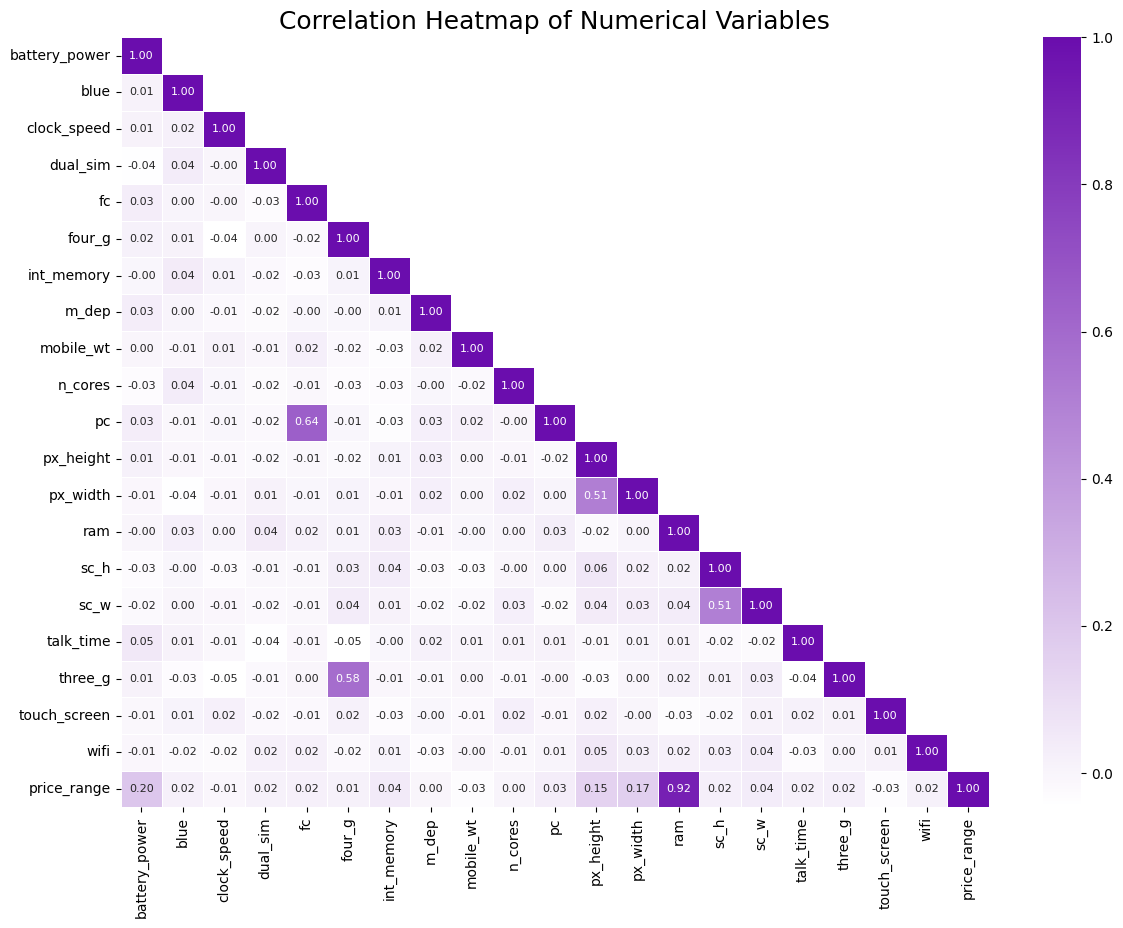

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Understanding – Correlation Analysis
#############################################

corr_code_writer = student_a
start_time_corr = now()

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Create a mask for the upper triangle (to show only the lower triangle)
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Create purple→white colormap
# cmap = colors.LinearSegmentedColormap.from_list("purple_contrast", ["#6A0DAD", "white"])
cmap = colors.LinearSegmentedColormap.from_list("purple_contrast_reversed", ["white", "#6A0DAD"])

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 8}, mask=mask, cmap=cmap, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=18)
plt.show()

end_time_corr = now()

#############################################
# Provenance Documentation
#############################################

corr_ass_uuid_executor = "0a0709a9-ecaa-4ee3-94c1-2b37b96e1852"

corr_executor = [
    f':correlation_analysis prov:qualifiedAssociation :{corr_ass_uuid_executor} .',
    f':{corr_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{corr_ass_uuid_executor} rdf:type prov:Association .',
    f':{corr_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(corr_executor, prefixes=prefixes)

corr_ass_uuid_writer = "e57283ec-40ef-4c65-8310-87172f233cf3"

corr_comment = """
A correlation heatmap was computed for all numeric variables including the target price_range.
Most off-diagonal entries are dark, indicating generally weak linear correlations between
features. A few feature pairs (e.g. front vs. primary camera, screen height vs. screen width,
and pixel height vs. pixel width) show slightly higher positive correlations, but no very strong
multicollinearity is visible. Correlation between individual features and price_range appears
moderate at most. Overall, the heatmap suggests that features provide complementary
information without severe redundancy.
"""

corr_activity = [
    ':correlation_analysis rdf:type prov:Activity .',
    ':correlation_analysis sc:isPartOf :data_understanding_phase .',
    f':correlation_analysis rdfs:comment """{corr_comment}""" .',
    f':correlation_analysis prov:startedAtTime "{start_time_corr}"^^xsd:dateTime .',
    f':correlation_analysis prov:endedAtTime "{end_time_corr}"^^xsd:dateTime .',
    f':correlation_analysis prov:qualifiedAssociation :{corr_ass_uuid_writer} .',
    f':{corr_ass_uuid_writer} prov:agent :{corr_code_writer} .',
    f':{corr_ass_uuid_writer} rdf:type prov:Association .',
    f':{corr_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    ':corr_matrix rdf:type prov:Entity .',
    f':corr_matrix rdfs:comment """{corr_matrix.to_string()}""" .',
    ':corr_matrix prov:wasGeneratedBy :correlation_analysis .',
]
engine.insert(corr_activity, prefixes=prefixes)


In [ ]:
#############################################
# Data Understanding – Data Quality Assessment
#############################################

dqa_code_writer = student_a
start_time_dqa = now()

# Programmatic checks
missing_values = data.isnull().sum().to_dict()
duplicate_count = int(data.duplicated().sum())

quality_report = {
    "missing_values": missing_values,
    "duplicate_rows": duplicate_count,
    "data_types": data.dtypes.astype(str).to_dict(),
    "value_range_issues": {
        "px_height_zero_count": int((data["px_height"] == 0).sum()),
        "sc_w_zero_count": int((data["sc_w"] == 0).sum())
    },
    "remarks": (
        "The dataset is complete: all 21 columns have 0 missing values and there are no "
        "duplicate rows. Numerical data types are consistent with the feature semantics. "
        "However, px_height has 2 zero values and sc_w has 180 zero values. These zeros are "
        "unlikely for real screens and may represent noisy or atypical records that should be "
        "handled carefully in the data preparation phase."
    )
}

print(json.dumps(quality_report, indent=2))

end_time_dqa = now()

#############################################
# Provenance Documentation
#############################################

dqa_ass_uuid_executor = "27c4dc86-7147-45a9-b17e-ade53867c2e8"

dqa_executor = [
    f':data_quality_assessment prov:qualifiedAssociation :{dqa_ass_uuid_executor} .',
    f':{dqa_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{dqa_ass_uuid_executor} rdf:type prov:Association .',
    f':{dqa_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(dqa_executor, prefixes=prefixes)

dqa_ass_uuid_writer = "5d037fa0-89ed-4ecd-b69b-975d17884658"

dqa_comment = """
Data quality checks show that the dataset is internally very clean: there are no missing
values in any of the 21 columns and no duplicate rows. All features have numeric dtypes
consistent with their intended semantics (integers or floats).

A potential issue is that px_height contains 2 zero values and sc_w contains 180 zero values.
Zero screen height or width is implausible for real mobile devices and may indicate noisy,
special, or incorrectly recorded cases. These findings should be considered in the data
preparation phase (e.g., deciding whether to filter, impute, or keep these records).
"""

dqa_activity = [
    ':data_quality_assessment rdf:type prov:Activity .',
    ':data_quality_assessment sc:isPartOf :data_understanding_phase .',
    f':data_quality_assessment rdfs:comment """{dqa_comment}""" .',
    f':data_quality_assessment prov:startedAtTime "{start_time_dqa}"^^xsd:dateTime .',
    f':data_quality_assessment prov:endedAtTime "{end_time_dqa}"^^xsd:dateTime .',
    f':data_quality_assessment prov:qualifiedAssociation :{dqa_ass_uuid_writer} .',
    f':{dqa_ass_uuid_writer} prov:agent :{dqa_code_writer} .',
    f':{dqa_ass_uuid_writer} rdf:type prov:Association .',
    f':{dqa_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    ':data_quality_report rdf:type prov:Entity .',
    f':data_quality_report rdfs:comment """{json.dumps(quality_report, indent=2)}""" .',
    ':data_quality_report prov:wasGeneratedBy :data_quality_assessment .',
]
engine.insert(dqa_activity, prefixes=prefixes)



{
  "missing_values": {
    "battery_power": 0,
    "blue": 0,
    "clock_speed": 0,
    "dual_sim": 0,
    "fc": 0,
    "four_g": 0,
    "int_memory": 0,
    "m_dep": 0,
    "mobile_wt": 0,
    "n_cores": 0,
    "pc": 0,
    "px_height": 0,
    "px_width": 0,
    "ram": 0,
    "sc_h": 0,
    "sc_w": 0,
    "talk_time": 0,
    "three_g": 0,
    "touch_screen": 0,
    "wifi": 0,
    "price_range": 0
  },
  "duplicate_rows": 0,
  "data_types": {
    "battery_power": "int64",
    "blue": "int64",
    "clock_speed": "float64",
    "dual_sim": "int64",
    "fc": "int64",
    "four_g": "int64",
    "int_memory": "int64",
    "m_dep": "float64",
    "mobile_wt": "int64",
    "n_cores": "int64",
    "pc": "int64",
    "px_height": "int64",
    "px_width": "int64",
    "ram": "int64",
    "sc_h": "int64",
    "sc_w": "int64",
    "talk_time": "int64",
    "three_g": "int64",
    "touch_screen": "int64",
    "wifi": "int64",
    "price_range": "int64"
  },
  "value_range_issues": {
    "px_heigh

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Understanding – 2e Ethical / Bias Aspects
#############################################

du_bias_code_writer = student_a
start_time_du_bias = now()
end_time_du_bias = now()

du_bias_ass_uuid_executor = "a8c4c0ba-0e4a-4b05-9bf7-0c7d7b3e1a10"

du_bias_executor = [
    ':du_bias_attributes rdf:type prov:Activity .',
    ':du_bias_attributes sc:isPartOf :data_understanding_phase .',
    f':du_bias_attributes prov:qualifiedAssociation :{du_bias_ass_uuid_executor} .',
    f':{du_bias_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{du_bias_ass_uuid_executor} rdf:type prov:Association .',
    f':{du_bias_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':du_bias_attributes prov:startedAtTime "{start_time_du_bias}"^^xsd:dateTime .',
    f':du_bias_attributes prov:endedAtTime "{end_time_du_bias}"^^xsd:dateTime .',
]
engine.insert(du_bias_executor, prefixes=prefixes)

du_bias_ass_uuid_writer = "039cc929-8117-44a3-abcc-f498b4d8d832"

du_bias_comment = """
The dataset contains no personal or sensitive attributes—only technical phone specifications.
The target price_range is perfectly balanced (500 samples per class).
Some device types are less frequent (e.g., rare feature combinations), but this affects model
performance rather than human fairness. No ethical or demographic bias risks are present.
"""

du_bias_activity = [
    ':du_bias_attributes_summary rdf:type prov:Entity .',
    ':du_bias_attributes_summary prov:wasGeneratedBy :du_bias_attributes .',
    ':du_bias_attributes_summary rdfs:label "2e Ethical / Bias Aspects" .',
    f':du_bias_attributes_summary rdfs:comment """{du_bias_comment}""" .',
]
engine.insert(du_bias_activity, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Understanding – 2f Risks & Expert Questions
#############################################

du_risk_code_writer = student_a
start_time_du_risk = now()
end_time_du_risk = now()

du_risk_ass_uuid_executor = "1907fabb-d64e-4b65-9a51-b0232c663d03"

du_risk_executor = [
    ':du_risk_analysis rdf:type prov:Activity .',
    ':du_risk_analysis sc:isPartOf :data_understanding_phase .',
    f':du_risk_analysis prov:qualifiedAssociation :{du_risk_ass_uuid_executor} .',
    f':{du_risk_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{du_risk_ass_uuid_executor} rdf:type prov:Association .',
    f':{du_risk_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':du_risk_analysis prov:startedAtTime "{start_time_du_risk}"^^xsd:dateTime .',
    f':du_risk_analysis prov:endedAtTime "{end_time_du_risk}"^^xsd:dateTime .',
]
engine.insert(du_risk_executor, prefixes=prefixes)

du_risk_ass_uuid_writer = "31229430-b424-43e5-8a2c-39699767bebf"

du_risk_comment = """
Potential risks include limited representativeness of devices in the dataset, since some 
feature combinations (e.g., very high camera MP or zero-sized screen dimensions) may not 
reflect real market distribution. Such records may introduce noise or skew model behavior. 
There is also a risk that the dataset does not capture newer technologies, causing future 
model drift.

Questions for an external domain expert include:
• Are zero values for px_height or sc_w technically valid or measurement artifacts?
• Are unusually high fc values real device specifications or outliers?
• Does the dataset represent a realistic mix of budget, mid-range, and high-end devices?
• Are any important device features missing that strongly influence real-world pricing?
"""

du_risk_activity = [
    ':du_risk_analysis_summary rdf:type prov:Entity .',
    ':du_risk_analysis_summary prov:wasGeneratedBy :du_risk_analysis .',
    ':du_risk_analysis_summary rdfs:label "2f Risks & Expert Questions" .',
    f':du_risk_analysis_summary rdfs:comment """{du_risk_comment}""" .',
]
engine.insert(du_risk_activity, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Understanding – 2g Actions Required for Data Preparation
#############################################

du_actions_code_writer = student_a
start_time_du_actions = now()
end_time_du_actions = now()

du_actions_ass_uuid_executor = "be62c375-e85e-4104-9863-6a700774143b"

du_actions_executor = [
    ':du_preparation_actions rdf:type prov:Activity .',
    ':du_preparation_actions sc:isPartOf :data_understanding_phase .',
    f':du_preparation_actions prov:qualifiedAssociation :{du_actions_ass_uuid_executor} .',
    f':{du_actions_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{du_actions_ass_uuid_executor} rdf:type prov:Association .',
    f':{du_actions_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':du_preparation_actions prov:startedAtTime "{start_time_du_actions}"^^xsd:dateTime .',
    f':du_preparation_actions prov:endedAtTime "{end_time_du_actions}"^^xsd:dateTime .',
]
engine.insert(du_actions_executor, prefixes=prefixes)

du_actions_ass_uuid_writer = "b7b77ece-d7e1-4be6-aeae-590c26c65d3a"

du_actions_comment = """
Based on the data understanding analysis, the following actions are recommended for the
data preparation phase:

- Handle zero values in px_height (2 cases) and sc_w (180 cases), as such values are 
  unlikely for real devices; consider filtering or imputing them.

- Evaluate whether to treat the 12 outliers in fc (front camera MP) as noise or keep them,
  depending on domain expert clarification.

- Standardize or scale numerical features (e.g., RAM, battery_power, pixel resolution),
  since they vary across different ranges and may affect model performance.

- Convert categorical binary features (e.g., blue, dual_sim, four_g, three_g, wifi) to 
  consistent types if needed, although no encoding is required because they are already numeric.

- Review potential skewness in some numerical variables and apply transformations if needed 
  for algorithms sensitive to non-normality.

- Ensure proper train–validation–test splitting to maintain the balanced distribution 
  of price_range classes.
"""

du_actions_activity = [
    ':du_preparation_actions_summary rdf:type prov:Entity .',
    ':du_preparation_actions_summary prov:wasGeneratedBy :du_preparation_actions .',
    ':du_preparation_actions_summary rdfs:label "2g Actions Required for Data Preparation" .',
    f':du_preparation_actions_summary rdfs:comment """{du_actions_comment}""" .',
]
engine.insert(du_actions_activity, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

## Data Preparation

In [ ]:
## Each Activity that follows is part of the Data Preparation Phase

data_preparation_phase_executor = [
f':data_preparation_phase rdf:type prov:Activity .',
f':data_preparation_phase rdfs:label "Data Preparation Phase" .', 
]
engine.insert(data_preparation_phase_executor, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

**Continue with other tasks of the Data Preparation phase such as binning, scaling etc...**

In [ ]:
#############################################
# Data Preparation – 3a Preprocessing Actions
# Duplicate check, missing value check, noise tagging
#############################################

prep_basic_code_writer = student_b

def preprocess_basic(df: pd.DataFrame):
    """
    Perform initial preprocessing steps based on Data Understanding:
    - Detect duplicates.
    - Detect missing values.
    - Detect noise-like values for px_height and sc_w (tag only, do not remove).
    """
    result = {}

    # Duplicate detection
    result["duplicate_count"] = int(df.duplicated().sum())

    # Missing values
    result["missing_values"] = df.isnull().sum().to_dict()

    # Noise detection (according to chosen thresholds)
    noise_sc_w = df[df["sc_w"] < 2].index.tolist()
    noise_px_height = df[df["px_height"] < 5].index.tolist()

    result["noise_sc_w_count"] = len(noise_sc_w)
    result["noise_px_height_count"] = len(noise_px_height)
    result["noise_sc_w_indices"] = noise_sc_w
    result["noise_px_height_indices"] = noise_px_height

    return result


start_time_prep_basic = now()
prep_basic_report = preprocess_basic(data)
end_time_prep_basic = now()

print(json.dumps(prep_basic_report, indent=2))

#############################################
# Provenance Documentation
#############################################

prep_basic_ass_uuid_executor = "d6e9783f-f036-41c8-8076-400664a30721"

prep_basic_executor = [
    f':prep_basic prov:qualifiedAssociation :{prep_basic_ass_uuid_executor} .',
    f':{prep_basic_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{prep_basic_ass_uuid_executor} rdf:type prov:Association .',
    f':{prep_basic_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(prep_basic_executor, prefixes=prefixes)

prep_basic_ass_uuid_writer = "16e9ce73-e036-4e57-a6be-11d35b0cc868"

prep_basic_comment = """
Initial preprocessing actions based on the Data Understanding phase:
• duplicate_count = 0 → no duplicate rows in the dataset.
• All 21 attributes have 0 missing values.
• Noise-like values: sc_w < 2 occurs in 390 rows; px_height < 5 occurs in 9 rows.
  These cases were identified and recorded but not removed at this stage, because
  their interpretation is unclear. We decided to keep them as some models such as SVM are relatively
  robust to such noise. Final handling can be decided later based on model behavior.
"""

prep_basic_activity = [
    ':prep_basic rdf:type prov:Activity .',
    ':prep_basic sc:isPartOf :data_preparation_phase .',
    f':prep_basic rdfs:comment """{prep_basic_comment}""" .',
    f':prep_basic prov:startedAtTime "{start_time_prep_basic}"^^xsd:dateTime .',
    f':prep_basic prov:endedAtTime "{end_time_prep_basic}"^^xsd:dateTime .',
    f':prep_basic prov:qualifiedAssociation :{prep_basic_ass_uuid_writer} .',
    f':{prep_basic_ass_uuid_writer} prov:agent :{prep_basic_code_writer} .',
    f':{prep_basic_ass_uuid_writer} rdf:type prov:Association .',
    f':{prep_basic_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Output entity
    ':prep_basic_report rdf:type prov:Entity .',
    f':prep_basic_report rdfs:comment """{json.dumps(prep_basic_report, indent=2)}""" .',
    ':prep_basic_report prov:wasGeneratedBy :prep_basic .',
]
engine.insert(prep_basic_activity, prefixes=prefixes)


{
  "duplicate_count": 0,
  "missing_values": {
    "battery_power": 0,
    "blue": 0,
    "clock_speed": 0,
    "dual_sim": 0,
    "fc": 0,
    "four_g": 0,
    "int_memory": 0,
    "m_dep": 0,
    "mobile_wt": 0,
    "n_cores": 0,
    "pc": 0,
    "px_height": 0,
    "px_width": 0,
    "ram": 0,
    "sc_h": 0,
    "sc_w": 0,
    "talk_time": 0,
    "three_g": 0,
    "touch_screen": 0,
    "wifi": 0,
    "price_range": 0
  },
  "noise_sc_w_count": 390,
  "noise_px_height_count": 9,
  "noise_sc_w_indices": [
    5,
    8,
    12,
    13,
    19,
    21,
    24,
    26,
    28,
    31,
    33,
    34,
    38,
    42,
    50,
    54,
    62,
    68,
    69,
    73,
    86,
    89,
    107,
    114,
    115,
    119,
    128,
    131,
    139,
    140,
    141,
    144,
    147,
    150,
    153,
    157,
    158,
    159,
    162,
    172,
    182,
    183,
    186,
    207,
    210,
    217,
    237,
    238,
    240,
    242,
    243,
    249,
    250,
    257,
    259,
    261,
    26

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Preparation – 3b Steps Considered but Not Applied
#############################################

prep_considered_code_writer = student_b
start_time_prep_considered = now()
end_time_prep_considered = now()

prep_considered_ass_uuid_executor = "5edaccd8-5083-4757-ad7a-f79c0ae532af"

prep_considered_executor = [
    ':prep_considered rdf:type prov:Activity .',
    ':prep_considered sc:isPartOf :data_preparation_phase .',
    f':prep_considered prov:qualifiedAssociation :{prep_considered_ass_uuid_executor} .',
    f':{prep_considered_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{prep_considered_ass_uuid_executor} rdf:type prov:Association .',
    f':{prep_considered_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':prep_considered prov:startedAtTime "{start_time_prep_considered}"^^xsd:dateTime .',
    f':prep_considered prov:endedAtTime "{end_time_prep_considered}"^^xsd:dateTime .',
]
engine.insert(prep_considered_executor, prefixes=prefixes)

prep_considered_ass_uuid_writer = "740fd7bf-4a32-4b46-8f9b-f05a17bb81a7"

prep_considered_comment = """
Preprocessing steps that were considered during the Data Preparation phase but not applied:

• Outlier removal:
  Outliers in the front-camera field (fc) were identified earlier. Since their domain
  validity is uncertain and they may represent legitimate device variations, they were
  not removed at this stage. Their impact will be assessed during modeling.

• Noise cleaning:
  Values identified as noise-like (sc_w < 2, px_height < 5) were retained for now.
  These may correspond to early or atypical devices. Noise handling will be reconsidered
  if models show sensitivity to these records.

• Feature removal based on low correlation:
  Pearson correlation was already evaluated in the Data Understanding phase. Although
  some features showed weak linear correlation with the target, correlation alone is not
  a reliable criterion for removal, especially when non-linear relationships may exist.
  Therefore, no features were dropped solely based on correlation, and model-based
  feature importance techniques will be used instead.

• Scaling and normalization:
  Scaling was considered but postponed. Only algorithms sensitive to feature magnitudes
  (e.g., SVM) will require scaling, and it will be applied at the model-specific stage (if required).

• Additional encoding:
  Binary technical attributes (blue, dual_sim, three_g, four_g, touch_screen, wifi) 
  are already coded as 0/1. We considered one-hot encoding, but since these are 
  simple binary flags, no further encoding was applied.
"""

prep_considered_activity = [
    ':prep_considered_summary rdf:type prov:Entity .',
    ':prep_considered_summary prov:wasGeneratedBy :prep_considered .',
    ':prep_considered_summary rdfs:label "3b Preprocessing Steps Considered but Not Applied" .',
    f':prep_considered_summary rdfs:comment """{prep_considered_comment}""" .',
]
engine.insert(prep_considered_activity, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Preparation – 3c Derived Attributes (Options & Potential)
#############################################

prep_derived_code_writer = student_b
start_time_prep_derived = now()
end_time_prep_derived = now()

prep_derived_ass_uuid_executor = "88847c41-7e7b-4354-a4e5-40950944c7b0"

prep_derived_executor = [
    ':prep_derived_attributes rdf:type prov:Activity .',
    ':prep_derived_attributes sc:isPartOf :data_preparation_phase .',
    f':prep_derived_attributes prov:qualifiedAssociation :{prep_derived_ass_uuid_executor} .',
    f':{prep_derived_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{prep_derived_ass_uuid_executor} rdf:type prov:Association .',
    f':{prep_derived_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':prep_derived_attributes prov:startedAtTime "{start_time_prep_derived}"^^xsd:dateTime .',
    f':prep_derived_attributes prov:endedAtTime "{end_time_prep_derived}"^^xsd:dateTime .',
]
engine.insert(prep_derived_executor, prefixes=prefixes)

prep_derived_ass_uuid_writer = "59fb3895-fa42-4b28-bc84-f09abc0cc18f"

prep_derived_comment = """
Data Preparation 3c - Options and potential for derived attributes:

Several derived attributes could potentially improve model performance or interpretability:

• Screen-related features:
  - pixel_area = px_height * px_width (proxy for screen resolution / sharpness)
  - screen_area = sc_h * sc_w (approximate physical display size)
  - pixel_density_ratio = pixel_area / screen_area (if sc_w and sc_h are reliable)

• Performance / capacity ratios:
  - ram_per_internal_memory = ram / int_memory (relative memory configuration)
  - battery_per_weight = battery_power / mobile_wt (capacity relative to device weight)
  - camera_total_mp = fc + pc (overall camera capability)

• Connectivity and feature counts:
  - connectivity_score = blue + three_g + four_g + wifi (simple feature count)
  - feature_richness = connectivity_score + touch_screen + dual_sim

These attributes could better capture interactions between existing variables and might help
models distinguish between devices within the same price_range. For now, they are documented
as options; actual creation will be decided based on model needs and complexity trade-offs.
"""

prep_derived_activity = [
    ':prep_derived_attributes_summary rdf:type prov:Entity .',
    ':prep_derived_attributes_summary prov:wasGeneratedBy :prep_derived_attributes .',
    ':prep_derived_attributes_summary rdfs:label "3c Derived Attribute Options" .',
    f':prep_derived_attributes_summary rdfs:comment """{prep_derived_comment}""" .',
]
engine.insert(prep_derived_activity, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Preparation – 3d External Data & Additional Attributes
#############################################

prep_external_code_writer = student_b
start_time_prep_external = now()
end_time_prep_external = now()

prep_external_ass_uuid_executor = "3c1838a8-f928-444d-870c-520536819ae2"

prep_external_executor = [
    ':prep_external_data rdf:type prov:Activity .',
    ':prep_external_data sc:isPartOf :data_preparation_phase .',
    f':prep_external_data prov:qualifiedAssociation :{prep_external_ass_uuid_executor} .',
    f':{prep_external_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{prep_external_ass_uuid_executor} rdf:type prov:Association .',
    f':{prep_external_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':prep_external_data prov:startedAtTime "{start_time_prep_external}"^^xsd:dateTime .',
    f':prep_external_data prov:endedAtTime "{end_time_prep_external}"^^xsd:dateTime .',
]
engine.insert(prep_external_executor, prefixes=prefixes)

prep_external_ass_uuid_writer = "648e4f19-635c-4b92-bbb4-b356285a91d3"

prep_external_comment = """
Data Preparation 3d - Options for additional external data sources and attributes:

The current dataset contains only technical specifications and an abstract price_range label.
Several external data sources could improve the alignment with the business goal of realistic
pricing and market positioning:

• Real retail prices:
  Link each device (or representative configurations) to historical market prices from
  online shops or price comparison portals. This would allow:
  - Training a regression model for actual price
  - Validating whether the price_range labels reflect realistic price bands

• Brand and model metadata:
  Add manufacturer brand, model family, and release year from public product catalogs.
  These attributes could capture brand effects and generation effects (newer vs. older
  technology) that strongly influence perceived value.

• Market segment and region:
  If available, add information about target market segment (e.g., budget, mid-range,
  flagship) or region (e.g., EU, US, Asia). This would allow more fine-grained analysis
  of price expectations across markets.

• User / expert ratings:
  External quality ratings (camera score, battery score, display rating) aggregated from
  review sites could help connect technical specs to perceived quality and justify
  differences within the same price_range.

These sources are hypothetical and not integrated in this project, but documenting them
clarifies how the dataset could be extended to support richer pricing and marketing analysis.
"""

prep_external_activity = [
    ':prep_external_data_summary rdf:type prov:Entity .',
    ':prep_external_data_summary prov:wasGeneratedBy :prep_external_data .',
    ':prep_external_data_summary rdfs:label "3d External Data & Additional Attributes" .',
    f':prep_external_data_summary rdfs:comment """{prep_external_comment}""" .',
]
engine.insert(prep_external_activity, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Data Preparation – Summary of Preprocessing Decisions
#############################################

prep_summary_code_writer = student_b
start_time_prep_summary = now()
end_time_prep_summary = now()

prep_summary_ass_uuid_executor = "a89dc405-1428-4840-b75f-c25d9f0ceacb"

prep_summary_executor = [
    ':prep_summary rdf:type prov:Activity .',
    ':prep_summary sc:isPartOf :data_preparation_phase .',
    f':prep_summary prov:qualifiedAssociation :{prep_summary_ass_uuid_executor} .',
    f':{prep_summary_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{prep_summary_ass_uuid_executor} rdf:type prov:Association .',
    f':{prep_summary_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':prep_summary prov:startedAtTime "{start_time_prep_summary}"^^xsd:dateTime .',
    f':prep_summary prov:endedAtTime "{end_time_prep_summary}"^^xsd:dateTime .',
]
engine.insert(prep_summary_executor, prefixes=prefixes)

prep_summary_ass_uuid_writer = "bf36fde6-d754-4ae6-9d0e-5a272074f34a"

prep_summary_comment = """
Summary of Data Preparation Decisions:

Based on the Data Understanding phase, additional preprocessing steps such as global scaling,
binning, categorical encoding, and outlier removal were considered but intentionally not applied.

• Scaling:
  Scaling is not applied globally because only certain models (e.g., SVM) require it. Scaling
  will be performed inside model-specific pipelines rather than altering the original dataset.

• Binning:
  No binning was applied because numerical attributes already show meaningful continuous ranges
  and the target price_range classes are balanced. There is no business or modeling justification
  for discretization.

• Outlier Removal:
  Although outliers were detected in the fc feature, they were retained. Their domain validity is
  uncertain, and premature removal could discard meaningful variation. These will be revisited
  only if models show sensitivity.

• Noise Values:
  Noise-like values in sc_w and px_height were identified but not cleaned, as these may represent
  early-generation devices. Models planned for later (e.g., SVM, Decision Tree, RF) are robust to
  such noise.

• Encoding:
  No encoding was necessary because all categorical features are already numeric (0/1 or ordinal).

• Feature Removal:
  Although Pearson correlation was analyzed in the Data Understanding phase, features were not
  removed solely based on low linear correlation. Non-linear relationships will be captured by
  model-based feature importance.

Conclusion:
Only essential checks (duplicates, missing values, noise tagging) were performed. All other
transformations were deferred to the modeling phase or deemed unnecessary given the dataset’s
clean and structured nature.
"""

prep_summary_activity = [
    ':prep_summary_entity rdf:type prov:Entity .',
    ':prep_summary_entity rdfs:label "Data Preparation Summary" .',
    f':prep_summary_entity rdfs:comment """{prep_summary_comment}""" .',
    ':prep_summary_entity prov:wasGeneratedBy :prep_summary .',
]
engine.insert(prep_summary_activity, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
# Your final transformed dataset should also be documented appropriately using Croissant, SI, etc.

#############################################
# Documentation – Final Prepared Dataset
#############################################

prepared_data_triples = [
    ':prepared_data rdf:type prov:Entity .',
    # The prepared dataset is the same as the original loaded dataset,
    # because no modifying preprocessing (e.g., removal, imputation) was applied.
    ':prepared_data prov:wasDerivedFrom :data .',
    ':prepared_data rdf:type sc:Dataset .',
    # You may add fields, recordsets, etc., if needed:
    # ':prepared_recordset rdf:type cr:RecordSet .',
    # ':prepared_data cr:recordSet :prepared_recordset .',
    # ':prepared_recordset cr:field :field_x .',
]
engine.insert(prepared_data_triples, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

## Modeling

In [ ]:
## Each Activity that follows is part of the Modeling Phase

modeling_phase_executor = [
f':modeling_phase rdf:type prov:Activity .',
f':modeling rdfs:label "Modeling Phase" .', 
]
engine.insert(modeling_phase_executor, prefixes=prefixes)


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
model_data_code_writer = student_a

#############################################
# Documentation 4a
#############################################

dma_ass_uuid_writer = "561e678f-c355-431d-a956-74d642cdd8c4"
dma_comment = """
Identify suitable algorithms and justify selection:

We considered several classification algorithms suitable for multi-class prediction of price_range:
- Logistic Regression / Linear models: simple baseline, but may underfit if boundaries are non-linear.
- Decision Tree / Random Forest: can capture non-linear relations, robust, and provide feature importance.
- Gradient Boosting: strong performance but higher complexity and more tuning required.
- Support Vector Machine (SVM): strong generalization, effective in high-dimensional feature spaces, robust to outliers,
  and works well with standardized numeric features.

Selected Algorithm: Support Vector Machine (SVM) classifier (SVC).
Justification: The dataset consists of numeric technical specifications with varying scales. SVM is a strong classifier
for medium-sized datasets and can generalize well. With proper scaling, linear SVM is computationally efficient and
often performs well on structured tabular data. We will use StandardScaler to avoid feature scale dominance.
"""

identify_data_mining_algorithm_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Algorithm definition
    f':svm_algorithm rdf:type mls:Algorithm .',
    f':svm_algorithm rdfs:label "Support Vector Machine (SVM) Classification Algorithm" .',

    # Implementation definition
    f':svm_sklearn_implementation rdf:type mls:Implementation .',
    f':svm_sklearn_implementation rdfs:label "scikit-learn SVC (Support Vector Classification)" .',
    f':svm_sklearn_implementation mls:implements :svm_algorithm .',
    f':svm_sklearn_implementation prov:wasGeneratedBy :define_algorithm .',

    # Evaluation Measures (needed for evaluation phase)
    f':accuracy_measure rdf:type mls:EvaluationMeasure .',
    f':accuracy_measure rdfs:label "Accuracy" .',
    f':accuracy_measure rdfs:comment "Fraction of correctly classified instances." .',
    f':accuracy_measure prov:wasGeneratedBy :define_algorithm .',

    f':macro_precision_measure rdf:type mls:EvaluationMeasure .',
    f':macro_precision_measure rdfs:label "Macro Precision" .',
    f':macro_precision_measure rdfs:comment "Precision averaged equally across classes." .',
    f':macro_precision_measure prov:wasGeneratedBy :define_algorithm .',

    f':macro_recall_measure rdf:type mls:EvaluationMeasure .',
    f':macro_recall_measure rdfs:label "Macro Recall" .',
    f':macro_recall_measure rdfs:comment "Recall averaged equally across classes." .',
    f':macro_recall_measure prov:wasGeneratedBy :define_algorithm .',

    f':macro_f1_measure rdf:type mls:EvaluationMeasure .',
    f':macro_f1_measure rdfs:label "Macro F1-score" .',
    f':macro_f1_measure rdfs:comment "F1 averaged equally across classes." .',
    f':macro_f1_measure prov:wasGeneratedBy :define_algorithm .',
]
engine.insert(identify_data_mining_algorithm_activity, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Documentation 4b
#############################################

hp_ass_uuid_writer = "7e5b5cb5-3755-4a7d-8409-611b11da0bdf"

# Full grid we considered (documented for transparency + compute impact)
full_param_grid = [
    {'kernel': ['poly'],
     'degree': [2, 3, 4, 5],
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'C': [0.01, 0.1, 1, 10, 100, 1000]},

    {'kernel': ['rbf', 'sigmoid'],
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'C': [0.01, 0.1, 1, 10, 100, 1000]},

    {'kernel': ['linear'],
     'C': [0.01, 0.1, 1, 10, 100, 1000]}
]

# Reduced grid we will use for tuning
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 50, 100]
}

# Compute effort estimation (helps satisfy requirement about compute impact)
# (Rough counts: number of candidate configs * number of CV folds)
def count_grid_candidates(grid):
    if isinstance(grid, dict):
        n = 1
        for v in grid.values():
            n *= len(v)
        return n
    elif isinstance(grid, list):
        total = 0
        for g in grid:
            n = 1
            for v in g.values():
                n *= len(v)
            total += n
        return total
    return 0

full_candidates = count_grid_candidates(full_param_grid)     # 120 + 60 + 6 = 186
reduced_candidates = count_grid_candidates(param_grid)       # 5

# You can align this number with your CV used in modeling (likely 5-fold)
cv_folds = 5
full_fit_estimate = full_candidates * cv_folds
reduced_fit_estimate = reduced_candidates * cv_folds

hp_comment = f"""
Hyperparameter identification and tuning decision (SVM / SVC):

Identified hyperparameters available for tuning in SVM (SVC):
- C: regularization strength (tradeoff between margin maximization and training error)
- kernel: decision boundary type (linear, rbf, poly, sigmoid)
- gamma: kernel coefficient for rbf/poly/sigmoid (controls locality of influence)
- degree: polynomial degree (only relevant for poly kernel)
- decision_function_shape: multi-class strategy (ovr/ovo) (typically less influential than C/kernel)

Candidate search space considered initially (broad grid):
- poly: degree ∈ [2,3,4,5], gamma ∈ [1,0.1,0.01,0.001,0.0001], C ∈ [0.01,0.1,1,10,100,1000]
- rbf/sigmoid: gamma ∈ [1,0.1,0.01,0.001,0.0001], C ∈ [0.01,0.1,1,10,100,1000]
- linear: C ∈ [0.01,0.1,1,10,100,1000]
Total candidate configurations in the broad grid: {full_candidates}.
With {cv_folds}-fold CV, this corresponds to about {full_fit_estimate} model fits, which is computationally expensive.

Selected hyperparameter(s) to tune:
- Primary hyperparameter tuned: C
- Kernel fixed to: linear

Justification:
Hyperparameter tuning for SVM is time-consuming because each candidate requires training multiple times under cross-validation.
Based on an initial exploration, the linear kernel appeared optimal for this dataset. Therefore, we restricted the tuning to a
linear SVM and focused on C, the most influential regularization parameter for linear SVM performance and generalization.
This reduces compute while keeping the tuning reproducible and meaningful.

Tuning performed:
- Grid (linear kernel): C ∈ {param_grid['C']}
Total candidate configurations in reduced grid: {reduced_candidates}.
With {cv_folds}-fold CV, this corresponds to about {reduced_fit_estimate} fits (much smaller than the broad grid).
"""

identify_hp_activity = [
    f':identify_hyperparameters rdf:type prov:Activity .',
    f':identify_hyperparameters sc:isPartOf :modeling_phase .',
    f':identify_hyperparameters rdfs:comment """{hp_comment}""" .',
    f':identify_hyperparameters prov:qualifiedAssociation :{hp_ass_uuid_writer} .',
    f':{hp_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{hp_ass_uuid_writer} rdf:type prov:Association .',
    f':{hp_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Hyperparameter definitions
    f':hp_C rdf:type mls:HyperParameter .',
    f':hp_C rdfs:label "C (Regularization strength)" .',
    f':hp_C rdfs:comment "Penalty parameter: larger C fits training data more closely; smaller C increases regularization / margin." .',
    f':hp_C prov:wasGeneratedBy :identify_hyperparameters .',
    f':svm_sklearn_implementation mls:hasHyperParameter :hp_C .',

    f':hp_kernel rdf:type mls:HyperParameter .',
    f':hp_kernel rdfs:label "kernel" .',
    f':hp_kernel rdfs:comment "Kernel function type (linear, rbf, poly, sigmoid) controlling decision boundary form and compute cost." .',
    f':hp_kernel prov:wasGeneratedBy :identify_hyperparameters .',
    f':svm_sklearn_implementation mls:hasHyperParameter :hp_kernel .',

    f':hp_gamma rdf:type mls:HyperParameter .',
    f':hp_gamma rdfs:label "gamma" .',
    f':hp_gamma rdfs:comment "Kernel coefficient for rbf/poly/sigmoid; controls influence radius of a single sample." .',
    f':hp_gamma prov:wasGeneratedBy :identify_hyperparameters .',
    f':svm_sklearn_implementation mls:hasHyperParameter :hp_gamma .',

    f':hp_degree rdf:type mls:HyperParameter .',
    f':hp_degree rdfs:label "degree" .',
    f':hp_degree rdfs:comment "Polynomial degree (only relevant for poly kernel)." .',
    f':hp_degree prov:wasGeneratedBy :identify_hyperparameters .',
    f':svm_sklearn_implementation mls:hasHyperParameter :hp_degree .',

    f':hp_decision_shape rdf:type mls:HyperParameter .',
    f':hp_decision_shape rdfs:label "decision_function_shape" .',
    f':hp_decision_shape rdfs:comment "Multi-class decision strategy (ovr vs ovo); typically less impactful than C/kernel." .',
    f':hp_decision_shape prov:wasGeneratedBy :identify_hyperparameters .',
    f':svm_sklearn_implementation mls:hasHyperParameter :hp_decision_shape .',

    # Document the broad grid (considered) and reduced grid (used) as Entities for reporting
    f':svm_full_param_grid rdf:type prov:Entity .',
    f':svm_full_param_grid rdfs:label "Full SVM grid considered" .',
    f':svm_full_param_grid rdfs:comment """{json.dumps(full_param_grid, indent=2)}""" .',
    f':svm_full_param_grid prov:wasGeneratedBy :identify_hyperparameters .',

    f':svm_reduced_param_grid rdf:type prov:Entity .',
    f':svm_reduced_param_grid rdfs:label "Reduced SVM grid used for tuning" .',
    f':svm_reduced_param_grid rdfs:comment """{json.dumps(param_grid, indent=2)}""" .',
    f':svm_reduced_param_grid prov:wasGeneratedBy :identify_hyperparameters .',

    f':svm_grid_compute_estimate rdf:type prov:Entity .',
    f':svm_grid_compute_estimate rdfs:label "SVM tuning compute effort estimate" .',
    f':svm_grid_compute_estimate rdfs:comment "Broad grid: {full_candidates} candidates (~{full_fit_estimate} CV fits at {cv_folds}-fold). Reduced grid: {reduced_candidates} candidates (~{reduced_fit_estimate} CV fits at {cv_folds}-fold)." .',
    f':svm_grid_compute_estimate prov:wasGeneratedBy :identify_hyperparameters .',
]

engine.insert(identify_hp_activity, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(df: pd.DataFrame):
    """
    Split the dataset into training, validation, and test sets.

    Split proportions:
    - Training: 60%
    - Validation: 20%
    - Test: 20%

    Stratification is applied on the target variable (price_range)
    to preserve class balance. No preprocessing or scaling is applied
    here to avoid data leakage.
    """

    # Separate features and target
    X = df.drop(columns=['price_range'])
    y = df['price_range']

    # Train+Validation (80%) vs Test (20%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X,
        y,
        test_size=0.20,
        random_state=0,
        stratify=y
    )

    # Train (60%) vs Validation (20%)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val,
        y_train_val,
        test_size=0.25,   # 0.25 × 80% = 20%
        random_state=0,
        stratify=y_train_val
    )

    return X_train, X_val, X_test, y_train, y_val, y_test


# --- Execute split ---
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

# --- Dataset sizes ---
n_total = len(data)
n_train = len(X_train)
n_val = len(X_val)
n_test = len(X_test)

print(f"Total samples: {n_total}")
print(f"Training set: {n_train}")
print(f"Validation set: {n_val}")
print(f"Test set: {n_test}")


#############################################
# Documentation 4c
#############################################

### Define Train/Validation/Test splits
split_ass_uuid_writer = "2de4d933-67e9-4f29-8db5-500c3e27c782"
split_comment = f"""
Train / Validation / Test split definition:

The dataset was split into three mutually exclusive subsets to support
model training, hyperparameter tuning, and final evaluation.

Splitting strategy:
- Target variable: price_range (multi-class)
- Stratified sampling to preserve class distribution
- Reproducibility ensured using random_state = 0

Split proportions:
- Training set: 60% ({n_train} samples)
- Validation set: 20% ({n_val} samples)
- Test set: 20% ({n_test} samples)

Rationale:
- Training set is used for fitting model parameters.
- Validation set is used exclusively for hyperparameter tuning and model selection.
- Test set is held out and used only once for final evaluation.

Data leakage prevention:
- No scaling, normalization, or transformation is applied during splitting.
- Any preprocessing steps that learn parameters (e.g., StandardScaler)
  will be fitted only on the training set and then applied to validation
  and test sets.
"""

## Use your prepared dataset (Note: No changes were applied in Data Preparation)
input_dataset = ":data"

define_split_activity = [
    f':define_data_split rdf:type prov:Activity .',
    f':define_data_split sc:isPartOf :modeling_phase .',
    f':define_data_split rdfs:comment "Train/Validation/Test Split Definition" .',
    f':define_data_split rdfs:comment """{split_comment}""" .',
    f':define_data_split prov:qualifiedAssociation :{split_ass_uuid_writer} .',
    f':{split_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{split_ass_uuid_writer} rdf:type prov:Association .',
    f':{split_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    f':define_data_split prov:used {input_dataset} .',

    # Training Set
    f':training_set rdf:type sc:Dataset .',
    f':training_set rdfs:label "Training Set" .',
    f':training_set prov:wasGeneratedBy :define_data_split .',
    f':training_set prov:wasDerivedFrom {input_dataset} .',
    f':training_set rdfs:comment "Contains {n_train} samples (60% of data), stratified by price_range." .',

    # Validation Set
    f':validation_set rdf:type sc:Dataset .',
    f':validation_set rdfs:label "Validation Set" .',
    f':validation_set prov:wasGeneratedBy :define_data_split .',
    f':validation_set prov:wasDerivedFrom {input_dataset} .',
    f':validation_set rdfs:comment "Contains {n_val} samples (20% of data), stratified by price_range." .',

    # Test Set
    f':test_set rdf:type sc:Dataset .',
    f':test_set rdfs:label "Test Set" .',
    f':test_set prov:wasGeneratedBy :define_data_split .',
    f':test_set prov:wasDerivedFrom {input_dataset} .',
    f':test_set rdfs:comment "Contains {n_test} samples (20% of data), held out for final evaluation." .',
]
engine.insert(define_split_activity, prefixes=prefixes)

Total samples: 2000
Training set: 1200
Validation set: 400
Test set: 400


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

Best params: {'svm__C': 100, 'svm__kernel': 'linear'}
Validation metrics: {'train_accuracy': 0.9925, 'val_accuracy': 0.9725, 'train_macro_f1': 0.9924999374993634, 'val_macro_f1': 0.9726120677149112}


,params,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
4,"{'svm__C': 100, 'svm__kernel': 'linear'}",0.992292,0.000833,0.955000,0.020310,1
3,"{'svm__C': 50, 'svm__kernel': 'linear'}",0.989375,0.002320,0.954167,0.011487,2
2,"{'svm__C': 10, 'svm__kernel': 'linear'}",0.984167,0.003864,0.952500,0.008580,3
1,"{'svm__C': 1, 'svm__kernel': 'linear'}",0.970208,0.002990,0.940000,0.013070,4
0,"{'svm__C': 0.1, 'svm__kernel': 'linear'}",0.951667,0.006374,0.924167,0.016116,5


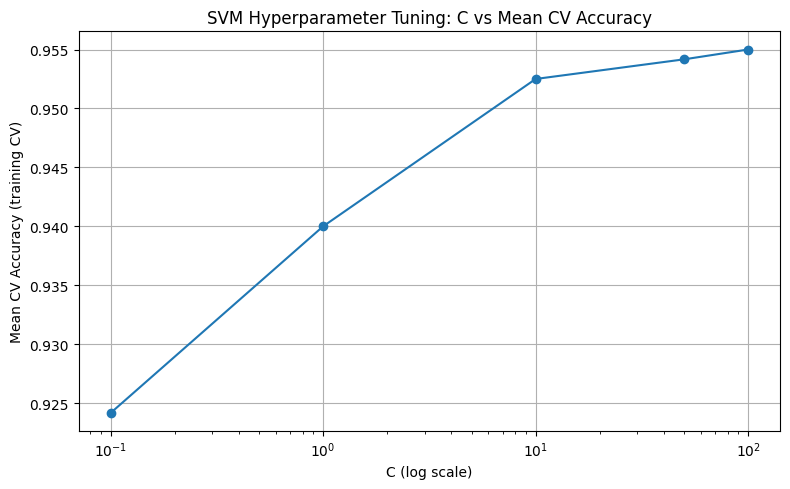

Saved tuning plot to: data\report\figures\svm_tuning_C_vs_cv_accuracy.png


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

import uuid

def train_and_finetune_model(X_train, y_train, X_val, y_val, param_grid):
    """
    Trains and tunes an SVM model on training data using GridSearchCV (CV inside training),
    then evaluates the best model on the validation set to select the best hyperparameter setting.

    Returns:
        best_estimator, cv_results_df, val_metrics_dict, best_params
    """

    # Pipeline prevents leakage: scaler is fit only on training folds during CV
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(probability=True, random_state=0))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring="accuracy",
        n_jobs=-1,
        cv=cv,
        return_train_score=True
    )

    grid.fit(X_train, y_train)

    best_estimator = grid.best_estimator_
    best_params = grid.best_params_

    # Evaluate best model on training and validation (explicit train vs val comparison)
    y_pred_train = best_estimator.predict(X_train)
    y_pred_val = best_estimator.predict(X_val)

    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)

    train_f1 = f1_score(y_train, y_pred_train, average="macro")
    val_f1 = f1_score(y_val, y_pred_val, average="macro")

    val_metrics = {
        "train_accuracy": float(train_acc),
        "val_accuracy": float(val_acc),
        "train_macro_f1": float(train_f1),
        "val_macro_f1": float(val_f1),
    }

    cv_results_df = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score")

    return best_estimator, cv_results_df, val_metrics, best_params

# ---------------------------
# Execute tuning/training
# ---------------------------

# Our reduced grid (linear kernel, tune C) defined earlier
param_grid_svm = {
    "svm__kernel": ["linear"],
    "svm__C": [0.1, 1, 10, 50, 100]
}


start_time_tafm = now()
# train_and_finetune_model()
best_model, cv_results_df, val_metrics, best_params = train_and_finetune_model(
    X_train, y_train, X_val, y_val, param_grid_svm
)
end_time_tafm = now() 

print("Best params:", best_params)
print("Validation metrics:", val_metrics)
display(cv_results_df[[
    "params", "mean_train_score", "std_train_score",
    "mean_test_score", "std_test_score", "rank_test_score"
]].head(10))

# ---------------------------
# Plot tuning process (4e)
# ---------------------------

# Extract C values and corresponding mean CV validation scores
# (GridSearchCV uses "mean_test_score" for CV scores)
plot_df = cv_results_df.copy()
plot_df["C"] = plot_df["param_svm__C"].astype(float)
plot_df = plot_df.sort_values("C")

out_fig_dir = os.path.join("data", "report", "figures")
os.makedirs(out_fig_dir, exist_ok=True)
plot_path = os.path.join(out_fig_dir, "svm_tuning_C_vs_cv_accuracy.png")

plt.figure(figsize=(8, 5))
plt.plot(plot_df["C"], plot_df["mean_test_score"], marker="o")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Mean CV Accuracy (training CV)")
plt.title("SVM Hyperparameter Tuning: C vs Mean CV Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_path, dpi=150)
plt.show()

print("Saved tuning plot to:", plot_path)


#############################################
# Documentation 4d & e & f
#############################################

tafm_ass_uuid_writer = "4b46db41-df33-4105-8596-bf26b3be56c7"
tafm_comment = f"""
SVM training, hyperparameter tuning, and model selection:

Approach:
- Model: Support Vector Classifier (SVC), tuned with a linear kernel.
- Hyperparameter tuned: C ∈ {param_grid_svm['svm__C']} with kernel fixed to 'linear'.
- Tuning method: GridSearchCV with StratifiedKFold (5 folds, shuffle=True, random_state=0).
  This ensures reproducibility and preserves class balance in each fold.

Training/Validation usage:
- CV tuning happens strictly inside the training set.
- The best setting from CV is then evaluated on the external validation set (X_val, y_val).

Results:
- Best hyperparameters found: {best_params}
- Training accuracy (best model): {val_metrics['train_accuracy']:.4f}
- Validation accuracy (best model): {val_metrics['val_accuracy']:.4f}
- Training Macro-F1 (best model): {val_metrics['train_macro_f1']:.4f}
- Validation Macro-F1 (best model): {val_metrics['val_macro_f1']:.4f}

Decision (4f):
- Selected the model with the highest mean CV accuracy (primary) and confirmed it on the
  held-out validation set. The tuning curve (C vs mean CV accuracy) is saved as:
  {plot_path}

All tested parameter settings are explicitly recorded in the knowledge graph (one Run per C).
"""

# --- Define IDs for measures, best model/run, and visualization ---
accuracy_measure = "accuracy_measure"
macro_f1_measure = "macro_f1_measure"
tuning_plot_entity = "svm_tuning_plot"

# We will log each tested setting as its own Run (only 5 -> manageable)
run_ids = []
model_ids = []
hp_setting_ids = []
eval_train_ids = []
eval_val_ids = []

triples = []

# Activity (parent)
triples += [
    f':train_and_finetune_model rdf:type prov:Activity .',
    f':train_and_finetune_model sc:isPartOf :modeling_phase .',
    f':train_and_finetune_model rdfs:comment """{tafm_comment}""" .',
    f':train_and_finetune_model prov:startedAtTime "{start_time_tafm}"^^xsd:dateTime .',
    f':train_and_finetune_model prov:endedAtTime "{end_time_tafm}"^^xsd:dateTime .',
    f':train_and_finetune_model prov:qualifiedAssociation :{tafm_ass_uuid_writer} .',
    f':{tafm_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{tafm_ass_uuid_writer} rdf:type prov:Association .',
    f':{tafm_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Ensure SVM algorithm/implementation exist (safe if already defined in 4a/4b)
    f':svm_algorithm rdf:type mls:Algorithm .',
    f':svm_algorithm rdfs:label "Support Vector Machine (SVM) Classification" .',

    f':svm_sklearn_implementation rdf:type mls:Implementation .',
    f':svm_sklearn_implementation rdfs:label "Scikit-learn SVC (Support Vector Classifier)" .',
    f':svm_sklearn_implementation mls:implements :svm_algorithm .',

    # Evaluation measures
    f':{accuracy_measure} rdf:type mls:EvaluationMeasure .',
    f':{accuracy_measure} rdfs:label "Accuracy" .',
    f':{accuracy_measure} rdfs:comment "Fraction of correctly classified instances." .',

    f':{macro_f1_measure} rdf:type mls:EvaluationMeasure .',
    f':{macro_f1_measure} rdfs:label "Macro F1-score" .',
    f':{macro_f1_measure} rdfs:comment "Unweighted mean F1 across classes (multi-class)." .',
]

# --- Visualisation entity for tuning plot ---
triples += [
    f':{tuning_plot_entity} rdf:type prov:Entity .',
    f':{tuning_plot_entity} rdfs:label "SVM tuning curve: C vs mean CV accuracy" .',
    f':{tuning_plot_entity} rdfs:comment "Saved figure path: {plot_path}" .',
    f':{tuning_plot_entity} prov:wasGeneratedBy :train_and_finetune_model .',
]

# --- Log each tested parameter setting (explicit reproducibility) ---
# Use cv_results_df to get mean CV accuracy per C setting
for i, row in plot_df.iterrows():
    C_val = float(row["C"])
    mean_cv_acc = float(row["mean_test_score"])
    mean_cv_train_acc = float(row["mean_train_score"])

    run_id = f"svm_run_{str(uuid.uuid4()).replace('-', '')[:12]}"
    model_id = f"svm_model_{str(uuid.uuid4()).replace('-', '')[:12]}"
    hpC_id = f"hp_setting_C_{str(uuid.uuid4()).replace('-', '')[:12]}"
    hpK_id = f"hp_setting_kernel_{str(uuid.uuid4()).replace('-', '')[:12]}"
    eval_train_id = f"eval_train_acc_{str(uuid.uuid4()).replace('-', '')[:12]}"
    eval_val_id = f"eval_cv_acc_{str(uuid.uuid4()).replace('-', '')[:12]}"

    run_ids.append(run_id)
    model_ids.append(model_id)
    hp_setting_ids += [hpC_id, hpK_id]
    eval_train_ids.append(eval_train_id)
    eval_val_ids.append(eval_val_id)

    triples += [
        # HyperParameterSetting: C
        f':{hpC_id} rdf:type mls:HyperParameterSetting .',
        f':{hpC_id} mls:specifiedBy :hp_C .',
        f':{hpC_id} mls:hasValue "{C_val}"^^xsd:double .',
        f':{hpC_id} prov:wasGeneratedBy :train_and_finetune_model .',

        # HyperParameterSetting: kernel (fixed)
        f':{hpK_id} rdf:type mls:HyperParameterSetting .',
        f':{hpK_id} mls:specifiedBy :hp_kernel .',
        f':{hpK_id} mls:hasValue "linear"^^xsd:string .',
        f':{hpK_id} prov:wasGeneratedBy :train_and_finetune_model .',

        # Run
        f':{run_id} rdf:type mls:Run .',
        f':{run_id} sc:isPartOf :train_and_finetune_model .',
        f':{run_id} mls:realizes :svm_algorithm .',
        f':{run_id} rdfs:label "SVM training run (kernel=linear, C={C_val})" .',
        f':{run_id} mls:executes :svm_sklearn_implementation .',
        f':{run_id} mls:hasInput :training_set .',
        f':{run_id} mls:hasInput :validation_set .',
        f':{run_id} mls:hasInput :{hpC_id} .',
        f':{run_id} mls:hasInput :{hpK_id} .',
        f':{run_id} mls:hasOutput :{model_id} .',
        f':{run_id} mls:hasOutput :{eval_train_id} .',
        f':{run_id} mls:hasOutput :{eval_val_id} .',

        # Model
        f':{model_id} rdf:type mls:Model .',
        f':{model_id} rdfs:label "SVM model (kernel=linear, C={C_val})" .',
        f':{model_id} prov:wasGeneratedBy :{run_id} .',
        f':{model_id} mlso:trainedOn :training_set .',
        f':{model_id} mlso:hasAlgorithmType :svm_algorithm .',

        # Evaluation: mean CV TRAIN accuracy (from GridSearchCV train score)
        f':{eval_train_id} rdf:type mls:ModelEvaluation .',
        f':{eval_train_id} prov:wasGeneratedBy :{run_id} .',
        f':{eval_train_id} mls:hasValue "{mean_cv_train_acc}"^^xsd:double .',
        f':{eval_train_id} mls:specifiedBy :{accuracy_measure} .',
        f':{eval_train_id} prov:used :training_set .',
        f':{eval_train_id} rdfs:comment "Mean CV training accuracy from GridSearchCV." .',

        # Evaluation: mean CV VALIDATION accuracy (GridSearchCV test score)
        f':{eval_val_id} rdf:type mls:ModelEvaluation .',
        f':{eval_val_id} prov:wasGeneratedBy :{run_id} .',
        f':{eval_val_id} mls:hasValue "{mean_cv_acc}"^^xsd:double .',
        f':{eval_val_id} mls:specifiedBy :{accuracy_measure} .',
        f':{eval_val_id} prov:used :training_set .',
        f':{eval_val_id} rdfs:comment "Mean CV validation accuracy (mean_test_score) from GridSearchCV (CV inside training set)." .',
    ]

# --- Log best model selection explicitly (based on external validation set) ---
best_model_entity = "best_svm_model"
best_selection_entity = "best_model_selection"

best_params_str = json.dumps(best_params)

best_selection_comment = (
    f"Best params: {best_params_str}; "
    f"Validation Accuracy={val_metrics['val_accuracy']:.4f}; "
    f"Validation Macro-F1={val_metrics['val_macro_f1']:.4f}"
)

triples += [
    f':{best_selection_entity} rdf:type prov:Entity .',
    f':{best_selection_entity} rdfs:label "Selected best model based on validation performance" .',
    f':{best_selection_entity} rdfs:comment "{best_selection_comment}" .',
    f':{best_selection_entity} prov:wasGeneratedBy :train_and_finetune_model .',

    f':{best_model_entity} rdf:type mls:Model .',
    f':{best_model_entity} rdfs:label "Best SVM model selected after tuning" .',
    f':{best_model_entity} rdfs:comment "Chosen using CV tuning on training set, confirmed on external validation set. Best params: {json.dumps(best_params)}" .',
    f':{best_model_entity} prov:wasGeneratedBy :train_and_finetune_model .',
    f':{best_model_entity} mlso:trainedOn :training_set .',
    f':{best_model_entity} mlso:hasAlgorithmType :svm_algorithm .',
]

engine.insert(triples, prefixes=prefixes)


In [ ]:

# --- combine train + validation (no leakage: test is untouched) ---
X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)

start_time_retrain = now()

# Rebuild the same pipeline and apply best hyperparameters found earlier
final_model_obj = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(probability=True, random_state=0))
])
final_model_obj.set_params(**best_params)

# Fit on full train+val
final_model_obj.fit(X_trainval, y_trainval)

# Optional: compute train+val metrics for documentation only (test happens in Evaluation phase)
y_pred_trainval = final_model_obj.predict(X_trainval)
trainval_acc = float(accuracy_score(y_trainval, y_pred_trainval))
trainval_f1  = float(f1_score(y_trainval, y_pred_trainval, average="macro"))

end_time_retrain = now()

print("Final model retrained with best params:", best_params)
print(f"Train+Val Accuracy (doc only): {trainval_acc:.4f}")
print(f"Train+Val Macro-F1 (doc only): {trainval_f1:.4f}")

#############################################
# Documentation 4g
#############################################

retrain_ass_uuid_writer = "19f16231-e2f1-4d97-9e63-2be319d0f66f" # Generate once

final_training_activity = ":retrain_final_model"
final_model = ":final_model_entity"

best_params_str = json.dumps(best_params)

retrain_comment = f"""
4g Final Model Retraining:

The final SVM model was retrained on the combined Training + Validation data using the
identical hyperparameters selected during tuning (4d–4f).

No data leakage:
- StandardScaler was refit ONLY on Train+Validation.
- The test set was not used and remains reserved for the Evaluation phase.

Best hyperparameters used:
{best_params_str}

Train+Validation size:
- Samples: {len(X_trainval)}

Train+Validation performance (documentation only, NOT test):
- Accuracy: {trainval_acc:.4f}
- Macro F1-score: {trainval_f1:.4f}
"""

retrain_documentation = [
    # Activity
    f'{final_training_activity} rdf:type prov:Activity .',
    f'{final_training_activity} sc:isPartOf :modeling_phase .',
    f'{final_training_activity} rdfs:comment """{retrain_comment}""" .',
    f'{final_training_activity} prov:startedAtTime "{start_time_retrain}"^^xsd:dateTime .',
    f'{final_training_activity} prov:endedAtTime "{end_time_retrain}"^^xsd:dateTime .',
    f'{final_training_activity} prov:qualifiedAssociation :{retrain_ass_uuid_writer} .',
    f':{retrain_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{retrain_ass_uuid_writer} rdf:type prov:Association .',
    f':{retrain_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Inputs (explicitly)
    f'{final_training_activity} prov:used :training_set .',
    f'{final_training_activity} prov:used :validation_set .',

    # Hyperparameter settings used (explicit)
    f':final_hp_kernel_setting rdf:type mls:HyperParameterSetting .',
    f':final_hp_kernel_setting mls:specifiedBy :hp_kernel .',
    f':final_hp_kernel_setting mls:hasValue "{best_params.get("svm__kernel", "linear")}"^^xsd:string .',
    f':final_hp_kernel_setting prov:wasGeneratedBy {final_training_activity} .',

    f':final_hp_C_setting rdf:type mls:HyperParameterSetting .',
    f':final_hp_C_setting mls:specifiedBy :hp_C .',
    f':final_hp_C_setting mls:hasValue "{float(best_params.get("svm__C", 1.0))}"^^xsd:double .',
    f':final_hp_C_setting prov:wasGeneratedBy {final_training_activity} .',

    # Final model entity
    f'{final_model} rdf:type mls:Model .',
    f'{final_model} rdfs:label "Final SVM Model (trained on Train+Validation)" .',
    f'{final_model} rdfs:comment "Retrained using best hyperparameters from tuning: {best_params_str}" .',
    f'{final_model} prov:wasGeneratedBy {final_training_activity} .',
    f'{final_model} mlso:trainedOn :training_set .',
    f'{final_model} mlso:trainedOn :validation_set .',
    f'{final_model} mlso:hasAlgorithmType :svm_algorithm .',

    # Optional train+val evals (not test)
    f':final_trainval_accuracy_eval rdf:type mls:ModelEvaluation .',
    f':final_trainval_accuracy_eval prov:wasGeneratedBy {final_training_activity} .',
    f':final_trainval_accuracy_eval mls:specifiedBy :accuracy_measure .',
    f':final_trainval_accuracy_eval mls:hasValue "{trainval_acc}"^^xsd:double .',
    f':final_trainval_accuracy_eval prov:used :training_set .',
    f':final_trainval_accuracy_eval prov:used :validation_set .',
    f':final_trainval_accuracy_eval rdfs:comment "Train+Validation accuracy after retraining (documentation only)." .',

    f':final_trainval_macro_f1_eval rdf:type mls:ModelEvaluation .',
    f':final_trainval_macro_f1_eval prov:wasGeneratedBy {final_training_activity} .',
    f':final_trainval_macro_f1_eval mls:specifiedBy :macro_f1_measure .',
    f':final_trainval_macro_f1_eval mls:hasValue "{trainval_f1}"^^xsd:double .',
    f':final_trainval_macro_f1_eval prov:used :training_set .',
    f':final_trainval_macro_f1_eval prov:used :validation_set .',
    f':final_trainval_macro_f1_eval rdfs:comment "Train+Validation Macro F1-score after retraining (documentation only)." .',
]


engine.insert(retrain_documentation, prefixes=prefixes)


Final model retrained with best params: {'svm__C': 100, 'svm__kernel': 'linear'}
Train+Val Accuracy (doc only): 0.9869
Train+Val Macro-F1 (doc only): 0.9869


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

## Evaluation

In [ ]:
## Each Activity that follows is part of the Evaluation Phase

evaluation_phase_executor = [
f':evaluation_phase rdf:type prov:Activity .',
f':evaluation_phase rdfs:label "Evaluation Phase" .', 
]
engine.insert(evaluation_phase_executor, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

=== Final Model Test Metrics ===
{
  "test_accuracy": 0.9825,
  "test_macro_precision": 0.9824994999499951,
  "test_macro_recall": 0.9825,
  "test_macro_f1": 0.9824873746843672,
  "test_micro_precision": 0.9825,
  "test_micro_recall": 0.9825,
  "test_micro_f1": 0.9825
}

=== Per-class Recall (from confusion matrix) ===
{
  "0": 1.0,
  "1": 0.98,
  "2": 0.97,
  "3": 0.98
}

=== Majority Baseline ===
{
  "majority_class": 0,
  "accuracy": 0.25,
  "macro_f1": 0.1,
  "macro_recall": 0.25
}

=== Random Baseline (seed=0) ===
{
  "seed": 0,
  "accuracy": 0.2525,
  "macro_f1": 0.2508720989465534,
  "macro_recall": 0.2525
}

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0     0.9901    1.0000    0.9950       100
           1     0.9800    0.9800    0.9800       100
           2     0.9700    0.9700    0.9700       100
           3     0.9899    0.9800    0.9849       100

    accuracy                         0.9825       400
   macro avg 

<Figure size 700x600 with 0 Axes>

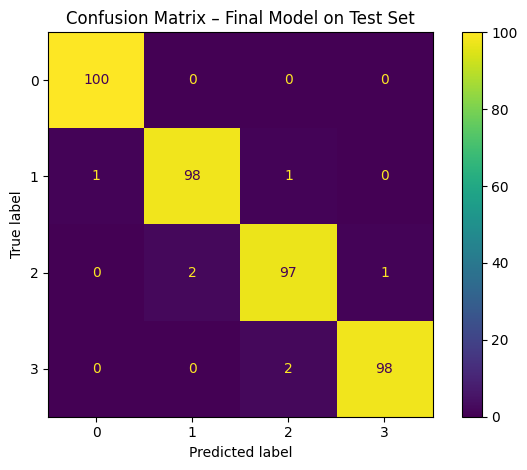

Saved confusion matrix figure to: data\report\figures\final_model_confusion_matrix_test.png


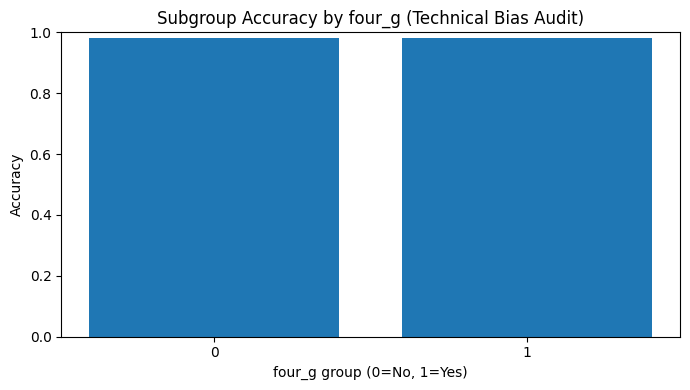

Saved bias subgroup accuracy figure to: data\report\figures\bias_subgroup_accuracy_four_g.png


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [89]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

eval_code_writer = student_b


def evaluate_on_test_data(final_model, X_test, y_test, protected_attr_series=None, protected_attr_name="four_g"):
    """
    5a: Apply final model on test data; report performance.
    5b(ii): Expected baseline performance for trivial classifiers (majority + uniform random).
    5c: Compare performance vs benchmark/baselines using multiple metrics + per-class + confusion matrix.
    5e: Bias check via subgroup performance by a chosen protected attribute.

    Note on "protected attribute" in this project:
    - This dataset concerns hardware specs (phones), not people (e.g., HR / loan approval).
    - Therefore, "protected attribute" here is used in a *technical bias audit* sense: we choose an
      attribute that defines meaningful subgroups where the model might behave systematically differently.
    - We choose `four_g` to test the hypothesis:
      "Does the model struggle to price legacy (non-4G) phones because training data may be dominated by modern 4G phones?"
    """
    # Predictions
    y_pred = final_model.predict(X_test)

    # Overall metrics (multi-class)
    metrics = {
        "test_accuracy": float(accuracy_score(y_test, y_pred)),
        "test_macro_precision": float(precision_score(y_test, y_pred, average="macro", zero_division=0)),
        "test_macro_recall": float(recall_score(y_test, y_pred, average="macro", zero_division=0)),
        "test_macro_f1": float(f1_score(y_test, y_pred, average="macro", zero_division=0)),
        "test_micro_precision": float(precision_score(y_test, y_pred, average="micro", zero_division=0)),
        "test_micro_recall": float(recall_score(y_test, y_pred, average="micro", zero_division=0)),
        "test_micro_f1": float(f1_score(y_test, y_pred, average="micro", zero_division=0)),
    }

    # Per-class report (string)
    cls_report = classification_report(y_test, y_pred, digits=4, zero_division=0)

    # Confusion matrix (array)
    cm = confusion_matrix(y_test, y_pred)

    # Per-class recall derived from confusion matrix
    per_class_recall = {}
    for i in range(cm.shape[0]):
        denom = cm[i, :].sum()
        per_class_recall[str(i)] = float(cm[i, i] / denom) if denom else 0.0

    # 5b(ii) Baselines (trivial)
    values, counts = np.unique(np.asarray(y_test), return_counts=True)

    # Majority class baseline
    majority_class = int(values[np.argmax(counts)])
    y_pred_majority = np.full_like(np.asarray(y_test), fill_value=majority_class)
    baseline_majority = {
        "majority_class": majority_class,
        "accuracy": float(accuracy_score(y_test, y_pred_majority)),
        "macro_f1": float(f1_score(y_test, y_pred_majority, average="macro", zero_division=0)),
        "macro_recall": float(recall_score(y_test, y_pred_majority, average="macro", zero_division=0)),
    }

    # Uniform random baseline (seeded)
    rng = np.random.default_rng(0)
    y_pred_random = rng.integers(low=int(np.min(values)), high=int(np.max(values)) + 1, size=len(y_test))
    baseline_random = {
        "seed": 0,
        "accuracy": float(accuracy_score(y_test, y_pred_random)),
        "macro_f1": float(f1_score(y_test, y_pred_random, average="macro", zero_division=0)),
        "macro_recall": float(recall_score(y_test, y_pred_random, average="macro", zero_division=0)),
    }

    # 5e Bias / subgroup performance using protected attribute
    bias_result = {
        "protected_attribute": protected_attr_name,
        "rationale": (
            "Technical bias audit: unlike HR/loan datasets, this dataset contains hardware specs rather than people. "
            "We still evaluate subgroup performance for reliability gaps. We choose `four_g` to test whether the model "
            "underperforms on legacy (non-4G) phones compared to modern (4G) phones."
        ),
        "groups": {}
    }

    if protected_attr_series is not None:
        protected_attr_series = pd.Series(protected_attr_series).reset_index(drop=True)
        y_test_s = pd.Series(y_test).reset_index(drop=True)
        y_pred_s = pd.Series(y_pred).reset_index(drop=True)

        for g in sorted(protected_attr_series.unique()):
            idx = protected_attr_series == g
            n = int(idx.sum())
            if n == 0:
                continue

            yt_g = y_test_s[idx]
            yp_g = y_pred_s[idx]

            # confusion matrix subgroup (same label space)
            labels_sorted = sorted(np.unique(y_test_s))
            cm_g = confusion_matrix(yt_g, yp_g, labels=labels_sorted)

            # subgroup per-class recall
            per_class_recall_g = {}
            for j, lab in enumerate(labels_sorted):
                denom_g = cm_g[j, :].sum()
                per_class_recall_g[str(lab)] = float(cm_g[j, j] / denom_g) if denom_g else 0.0

            bias_result["groups"][str(g)] = {
                "n": n,
                "accuracy": float(accuracy_score(yt_g, yp_g)),
                "macro_precision": float(precision_score(yt_g, yp_g, average="macro", zero_division=0)),
                "macro_recall": float(recall_score(yt_g, yp_g, average="macro", zero_division=0)),
                "macro_f1": float(f1_score(yt_g, yp_g, average="macro", zero_division=0)),
                "per_class_recall": per_class_recall_g,
            }

    return metrics, cls_report, cm, per_class_recall, baseline_majority, baseline_random, bias_result


# ============================================================
# Execute evaluation
# ============================================================

start_time_eval = now()

protected_attr_name = "four_g"
protected_attr_series = (
    X_test[protected_attr_name]
    if hasattr(X_test, "columns") and protected_attr_name in X_test.columns
    else None
)

(
    test_metrics,
    test_classification_report,
    test_cm,
    per_class_recall,
    baseline_majority,
    baseline_random,
    bias_result
) = evaluate_on_test_data(
    final_model=final_model_obj,
    X_test=X_test,
    y_test=y_test,
    protected_attr_series=protected_attr_series,
    protected_attr_name=protected_attr_name
)

end_time_eval = now()

print("=== Final Model Test Metrics ===")
print(json.dumps(test_metrics, indent=2))
print("\n=== Per-class Recall (from confusion matrix) ===")
print(json.dumps(per_class_recall, indent=2))
print("\n=== Majority Baseline ===")
print(json.dumps(baseline_majority, indent=2))
print("\n=== Random Baseline (seed=0) ===")
print(json.dumps(baseline_random, indent=2))
print("\n=== Classification Report (Test) ===")
print(test_classification_report)
print("\n=== Bias / Subgroup Result (Protected Attribute) ===")
print(json.dumps(bias_result, indent=2))


# ============================================================
# Save figures for report + KG entities
#   - Confusion matrix
#   - Bias subgroup bar chart (accuracy by group)
# ============================================================

fig_dir = os.path.join("data", "report", "figures")
os.makedirs(fig_dir, exist_ok=True)

# (1) Confusion matrix figure
cm_path = os.path.join(fig_dir, "final_model_confusion_matrix_test.png")
plt.figure(figsize=(7, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot(values_format="d")
plt.title("Confusion Matrix – Final Model on Test Set")
plt.tight_layout()
plt.savefig(cm_path, dpi=150)
plt.show()
print("Saved confusion matrix figure to:", cm_path)

# (2) Bias subgroup accuracy plot (if available)
bias_plot_path = ""
if protected_attr_series is not None and len(bias_result.get("groups", {})) > 0:
    groups_sorted = sorted(bias_result["groups"].keys(), key=lambda x: str(x))
    accs = [bias_result["groups"][g]["accuracy"] for g in groups_sorted]

    bias_plot_path = os.path.join(fig_dir, f"bias_subgroup_accuracy_{protected_attr_name}.png")
    plt.figure(figsize=(7, 4))
    plt.bar(groups_sorted, accs)
    plt.ylim(0.0, 1.0)
    plt.xlabel(f"{protected_attr_name} group (0=No, 1=Yes)")
    plt.ylabel("Accuracy")
    plt.title(f"Subgroup Accuracy by {protected_attr_name} (Technical Bias Audit)")
    plt.tight_layout()
    plt.savefig(bias_plot_path, dpi=150)
    plt.show()
    print("Saved bias subgroup accuracy figure to:", bias_plot_path)
else:
    print("Bias subgroup plot not created (protected attribute not available in X_test).")


# ============================================================
# 5b(i) State-of-the-art / benchmark performance (MANUAL SOURCE)
# We used Kaggle notebook as benchmark reference
# ============================================================

benchmark_url = "https://www.kaggle.com/code/zorornoa/mobile-price-prediction"
benchmark_table_text = """
External benchmark (Kaggle notebook):
Source: https://www.kaggle.com/code/zorornoa/mobile-price-prediction

Reported benchmarks:
Random Forest        | Test Accuracy: 0.9150 | CV Accuracy: 0.8787 (±0.0118)
XGBoost              | Test Accuracy: 0.9325 | CV Accuracy: 0.8950 (±0.0064)
Gradient Boosting    | Test Accuracy: 0.9125 | CV Accuracy: 0.8919 (±0.0187)
SVM                  | Test Accuracy: 0.8625 | CV Accuracy: 0.8412 (±0.0170)
Logistic Regression  | Test Accuracy: 0.9575 | CV Accuracy: 0.9481 (±0.0121)
K-Nearest Neighbors  | Test Accuracy: 0.4700 | CV Accuracy: 0.4700 (±0.0177)
Decision Tree        | Test Accuracy: 0.8675 | CV Accuracy: 0.8206 (±0.0249)
Naive Bayes          | Test Accuracy: 0.8275 | CV Accuracy: 0.7937 (±0.0240)

Note:
These values were extracted manually from the referenced notebook and documented here for benchmarking purposes.
""".strip()

benchmark_svm_test_acc = 0.8625
benchmark_best_test_acc = 0.9575  # Logistic Regression in that notebook


# ============================================================
# 5d Compare performance to Business Understanding success criteria (REFERENCE)
# ============================================================

data_mining_success_criteria_comment = """
1. Achieve ≥90% accuracy on the validation/test set.
2. Macro F1-score ≥0.88 with no class having recall <0.80.
3. Model performance remains stable across different random splits.
4. Probabilities are reasonably calibrated for business decision use.
""".strip()

min_acc = 0.90
min_macro_f1 = 0.88
acc_ok = test_metrics["test_accuracy"] >= min_acc
macro_f1_ok = test_metrics["test_macro_f1"] >= min_macro_f1
min_recall_ok = all(r >= 0.80 for r in per_class_recall.values())

success_compare_comment = f"""
5d) Comparison to Business Understanding success criteria (referencing :bu_data_mining_success_criteria)

BU Data Mining Success Criteria:
{data_mining_success_criteria_comment}

Achieved on test set:
- Accuracy = {test_metrics['test_accuracy']:.4f} (meets ≥0.90? {acc_ok})
- Macro F1 = {test_metrics['test_macro_f1']:.4f} (meets ≥0.88? {macro_f1_ok})
- Per-class recall (must all be ≥0.80): {json.dumps(per_class_recall, indent=2)}
  (meets per-class recall constraint? {min_recall_ok})

Note:
- Stability across different random splits and probability calibration will be covered in the final submission
  (requires repeated split experiments + calibration analysis).
""".strip()


# ============================================================
# 5c Comparison narrative (benchmark + baselines + per-class + confusion matrix)
# ============================================================

comparison_comment = f"""
5c) Comparison against benchmark and trivial baselines using multiple metrics.

Our final model:
- Test Accuracy = {test_metrics['test_accuracy']:.4f}
- Test Macro Precision = {test_metrics['test_macro_precision']:.4f}
- Test Macro Recall = {test_metrics['test_macro_recall']:.4f}
- Test Macro F1 = {test_metrics['test_macro_f1']:.4f}
- Test Micro F1 = {test_metrics['test_micro_f1']:.4f}
- Per-class recall: {json.dumps(per_class_recall, indent=2)}

Trivial baselines (5b-ii):
- Majority baseline: acc={baseline_majority['accuracy']:.4f}, macro_f1={baseline_majority['macro_f1']:.4f}
- Uniform random baseline (seed=0): acc={baseline_random['accuracy']:.4f}, macro_f1={baseline_random['macro_f1']:.4f}

External benchmark (5b-i, Kaggle notebook):
- Reported SVM Test Accuracy = {benchmark_svm_test_acc:.4f}
- Best reported Test Accuracy in that notebook = {benchmark_best_test_acc:.4f}

Interpretation:
- Being substantially above the random and majority baselines indicates the model learns meaningful structure.
- Differences vs Kaggle benchmarks can arise from: split strategy, preprocessing, scaling, tuned hyperparameters,
  random seeds, and evaluation protocol. We document these for reproducibility.
""".strip()


# ============================================================
# Knowledge Graph documentation (ALL requirements 5a–5e)
# ============================================================

eval_ass_uuid = "f4e6b5f2-8529-434a-8d83-be38d9ef9ee1"  # Generate once (keep stable)

# Measures (safe to reinsert)
acc_measure = "eval_accuracy_measure"
macro_f1_measure = "eval_macro_f1_measure"
macro_prec_measure = "eval_macro_precision_measure"
macro_rec_measure = "eval_macro_recall_measure"
micro_f1_measure = "eval_micro_f1_measure"

# Fresh entities for this run
eval_metrics_entity = f"eval_metrics_{str(uuid.uuid4()).replace('-', '')[:12]}"
eval_report_entity = f"eval_classification_report_{str(uuid.uuid4()).replace('-', '')[:12]}"
eval_cm_entity = f"eval_confusion_matrix_{str(uuid.uuid4()).replace('-', '')[:12]}"
eval_perclass_entity = f"eval_perclass_recall_{str(uuid.uuid4()).replace('-', '')[:12]}"

baseline_majority_entity = f"baseline_majority_{str(uuid.uuid4()).replace('-', '')[:12]}"
baseline_random_entity = f"baseline_random_{str(uuid.uuid4()).replace('-', '')[:12]}"

sota_source_entity = f"sota_benchmark_source_{str(uuid.uuid4()).replace('-', '')[:12]}"
sota_results_entity = f"sota_benchmark_results_{str(uuid.uuid4()).replace('-', '')[:12]}"

comparison_entity = f"benchmark_comparison_{str(uuid.uuid4()).replace('-', '')[:12]}"
success_compare_entity = f"success_compare_{str(uuid.uuid4()).replace('-', '')[:12]}"

bias_eval_entity = f"bias_eval_{str(uuid.uuid4()).replace('-', '')[:12]}"
bias_fig_entity = f"bias_plot_{str(uuid.uuid4()).replace('-', '')[:12]}"

protected_attribute_context = f"""
Protected attribute selection rationale (technical bias audit):

Selecting a protected attribute here is different from classical fairness scenarios (e.g., Human Resources hiring or loan approval),
because we are dealing with device hardware specifications rather than sensitive personal attributes.

However, for a technical bias audit, we still look for attributes that form distinct subgroups where model performance might differ.
We choose '{protected_attr_name}' to check whether the model struggles on "legacy" devices (non-4G) compared to modern 4G devices.

Question investigated:
"Does the model struggle to price legacy (non-4G) phones because the training data is dominated by modern 4G phones?"

Method:
- Compute subgroup metrics (accuracy, macro precision/recall/F1) for each '{protected_attr_name}' group.
- Check subgroup per-class recall distributions to detect performance gaps.
- Visualize subgroup accuracy for quick inspection.
""".strip()

# One top-level evaluation comment for the activity
eval_comment = f"""
Evaluation phase (Section 5) summary:

5a) Final model applied to test set and evaluated.
- Accuracy={test_metrics['test_accuracy']:.4f}, Macro-F1={test_metrics['test_macro_f1']:.4f}, Micro-F1={test_metrics['test_micro_f1']:.4f}

5b(i) External benchmark identified (Kaggle notebook) and documented as entities:
- {benchmark_url}

5b(ii) Trivial baselines computed:
- Majority baseline acc={baseline_majority['accuracy']:.4f}
- Random baseline (seed=0) acc={baseline_random['accuracy']:.4f}

5c) Comparison vs benchmark and baselines:
- See dedicated comparison entity with multi-metric discussion + per-class recall and confusion matrix reference.

5d) Compared against BU success criteria (referencing :bu_data_mining_success_criteria):
- Meets Accuracy≥0.90? {acc_ok}
- Meets Macro-F1≥0.88? {macro_f1_ok}
- Meets per-class recall ≥0.80 for all classes? {min_recall_ok}

5e) Bias / subgroup audit using protected attribute '{protected_attr_name}':
- See dedicated bias evaluation entity containing subgroup metrics + rationale.

Artifacts:
- Confusion matrix figure: {cm_path}
- Bias subgroup accuracy figure: {bias_plot_path if bias_plot_path else "N/A (attribute not available in X_test)"}
""".strip()

evaluate_activity = [
    # Activity
    f':evaluate_final_model rdf:type prov:Activity .',
    f':evaluate_final_model sc:isPartOf :evaluation_phase .',
    f':evaluate_final_model rdfs:label "Final Model Evaluation on Test Set (Section 5: 5a–5e)" .',
    f':evaluate_final_model rdfs:comment """{eval_comment}""" .',
    f':evaluate_final_model prov:startedAtTime "{start_time_eval}"^^xsd:dateTime .',
    f':evaluate_final_model prov:endedAtTime "{end_time_eval}"^^xsd:dateTime .',
    f':evaluate_final_model prov:qualifiedAssociation :{eval_ass_uuid} .',

    # Association
    f':{eval_ass_uuid} prov:agent :{eval_code_writer} .',
    f':{eval_ass_uuid} rdf:type prov:Association .',
    f':{eval_ass_uuid} prov:hadRole :{code_writer_role} .',

    # Inputs
    f':evaluate_final_model prov:used :final_model_entity .',
    f':evaluate_final_model prov:used :test_set .',

    # Reference success criteria entity from BU (REFERENCE only)
    f':evaluate_final_model prov:used :bu_data_mining_success_criteria .',

    # Measures
    f':{acc_measure} rdf:type mls:EvaluationMeasure .',
    f':{acc_measure} rdfs:label "Accuracy" .',

    f':{macro_f1_measure} rdf:type mls:EvaluationMeasure .',
    f':{macro_f1_measure} rdfs:label "Macro F1-score" .',

    f':{macro_prec_measure} rdf:type mls:EvaluationMeasure .',
    f':{macro_prec_measure} rdfs:label "Macro Precision" .',

    f':{macro_rec_measure} rdf:type mls:EvaluationMeasure .',
    f':{macro_rec_measure} rdfs:label "Macro Recall" .',

    f':{micro_f1_measure} rdf:type mls:EvaluationMeasure .',
    f':{micro_f1_measure} rdfs:label "Micro F1-score" .',

    # Store full test metrics JSON (5a/5c)
    f':{eval_metrics_entity} rdf:type mls:ModelEvaluation .',
    f':{eval_metrics_entity} prov:wasGeneratedBy :evaluate_final_model .',
    f':{eval_metrics_entity} rdfs:label "Final model test metrics (JSON)" .',
    f':{eval_metrics_entity} rdfs:comment """{json.dumps(test_metrics, indent=2)}""" .',
    f':{eval_metrics_entity} prov:used :test_set .',

    # Individual metric nodes (query-friendly)
    f':eval_test_accuracy rdf:type mls:ModelEvaluation .',
    f':eval_test_accuracy prov:wasGeneratedBy :evaluate_final_model .',
    f':eval_test_accuracy mls:specifiedBy :{acc_measure} .',
    f':eval_test_accuracy mls:hasValue "{test_metrics["test_accuracy"]}"^^xsd:double .',
    f':eval_test_accuracy prov:used :test_set .',

    f':eval_test_macro_f1 rdf:type mls:ModelEvaluation .',
    f':eval_test_macro_f1 prov:wasGeneratedBy :evaluate_final_model .',
    f':eval_test_macro_f1 mls:specifiedBy :{macro_f1_measure} .',
    f':eval_test_macro_f1 mls:hasValue "{test_metrics["test_macro_f1"]}"^^xsd:double .',
    f':eval_test_macro_f1 prov:used :test_set .',

    f':eval_test_micro_f1 rdf:type mls:ModelEvaluation .',
    f':eval_test_micro_f1 prov:wasGeneratedBy :evaluate_final_model .',
    f':eval_test_micro_f1 mls:specifiedBy :{micro_f1_measure} .',
    f':eval_test_micro_f1 mls:hasValue "{test_metrics["test_micro_f1"]}"^^xsd:double .',
    f':eval_test_micro_f1 prov:used :test_set .',

    f':eval_test_macro_precision rdf:type mls:ModelEvaluation .',
    f':eval_test_macro_precision prov:wasGeneratedBy :evaluate_final_model .',
    f':eval_test_macro_precision mls:specifiedBy :{macro_prec_measure} .',
    f':eval_test_macro_precision mls:hasValue "{test_metrics["test_macro_precision"]}"^^xsd:double .',
    f':eval_test_macro_precision prov:used :test_set .',

    f':eval_test_macro_recall rdf:type mls:ModelEvaluation .',
    f':eval_test_macro_recall prov:wasGeneratedBy :evaluate_final_model .',
    f':eval_test_macro_recall mls:specifiedBy :{macro_rec_measure} .',
    f':eval_test_macro_recall mls:hasValue "{test_metrics["test_macro_recall"]}"^^xsd:double .',
    f':eval_test_macro_recall prov:used :test_set .',

    # Per-class recall entity (5c)
    f':{eval_perclass_entity} rdf:type prov:Entity .',
    f':{eval_perclass_entity} prov:wasGeneratedBy :evaluate_final_model .',
    f':{eval_perclass_entity} rdfs:label "Per-class recall on test set (from confusion matrix)" .',
    f':{eval_perclass_entity} rdfs:comment """{json.dumps(per_class_recall, indent=2)}""" .',

    # Classification report entity
    f':{eval_report_entity} rdf:type prov:Entity .',
    f':{eval_report_entity} prov:wasGeneratedBy :evaluate_final_model .',
    f':{eval_report_entity} rdfs:label "Classification report (test)" .',
    f':{eval_report_entity} rdfs:comment """{test_classification_report}""" .',

    # Confusion matrix entity / figure reference
    f':{eval_cm_entity} rdf:type prov:Entity .',
    f':{eval_cm_entity} prov:wasGeneratedBy :evaluate_final_model .',
    f':{eval_cm_entity} rdfs:label "Confusion matrix figure (test)" .',
    f':{eval_cm_entity} rdfs:comment "Saved figure path: {cm_path}" .',

    # 5b(ii) Baseline entities
    f':{baseline_majority_entity} rdf:type prov:Entity .',
    f':{baseline_majority_entity} prov:wasGeneratedBy :evaluate_final_model .',
    f':{baseline_majority_entity} rdfs:label "Majority-class baseline performance" .',
    f':{baseline_majority_entity} rdfs:comment """{json.dumps(baseline_majority, indent=2)}""" .',

    f':{baseline_random_entity} rdf:type prov:Entity .',
    f':{baseline_random_entity} prov:wasGeneratedBy :evaluate_final_model .',
    f':{baseline_random_entity} rdfs:label "Uniform random baseline performance (seed=0)" .',
    f':{baseline_random_entity} rdfs:comment """{json.dumps(baseline_random, indent=2)}""" .',

    # 5b(i) Benchmark source + results (Kaggle)
    f':{sota_source_entity} rdf:type prov:Entity .',
    f':{sota_source_entity} rdfs:label "External benchmark source (Kaggle notebook)" .',
    f':{sota_source_entity} rdfs:comment "Source URL: {benchmark_url}" .',
    f':{sota_source_entity} prov:wasGeneratedBy :evaluate_final_model .',

    f':{sota_results_entity} rdf:type prov:Entity .',
    f':{sota_results_entity} rdfs:label "External benchmark results (Kaggle)" .',
    f':{sota_results_entity} rdfs:comment """{benchmark_table_text}""" .',
    f':{sota_results_entity} prov:wasGeneratedBy :evaluate_final_model .',

    # 5c comparison entity
    f':{comparison_entity} rdf:type prov:Entity .',
    f':{comparison_entity} rdfs:label "Benchmark and baseline comparison (5c)" .',
    f':{comparison_entity} rdfs:comment """{comparison_comment}""" .',
    f':{comparison_entity} prov:wasGeneratedBy :evaluate_final_model .',

    # 5d comparison to BU success criteria
    f':{success_compare_entity} rdf:type prov:Entity .',
    f':{success_compare_entity} rdfs:label "Comparison to Business Understanding success criteria (5d)" .',
    f':{success_compare_entity} rdfs:comment """{success_compare_comment}""" .',
    f':{success_compare_entity} prov:wasGeneratedBy :evaluate_final_model .',

    # 5e Bias evaluation entity (subgroup metrics + rationale)
    f':{bias_eval_entity} rdf:type mls:ModelEvaluation .',
    f':{bias_eval_entity} prov:wasGeneratedBy :evaluate_final_model .',
    f':{bias_eval_entity} rdfs:label "Bias / subgroup evaluation (protected attribute audit)" .',
    f':{bias_eval_entity} rdfs:comment """{protected_attribute_context}\n\nSubgroup metrics:\n{json.dumps(bias_result, indent=2)}""" .',
]

# Optional bias figure entity if created
if bias_plot_path:
    evaluate_activity += [
        f':{bias_fig_entity} rdf:type prov:Entity .',
        f':{bias_fig_entity} prov:wasGeneratedBy :evaluate_final_model .',
        f':{bias_fig_entity} rdfs:label "Bias subgroup accuracy figure" .',
        f':{bias_fig_entity} rdfs:comment "Saved figure path: {bias_plot_path}" .',
    ]

engine.insert(evaluate_activity, prefixes=prefixes)

## Deployment

In [ ]:
## Each Activity that follows is part of the Deployment Phase

deployment_phase_executor = [
f':deployment_phase rdf:type prov:Activity .',
f':deployment_phase rdfs:label "Deployment Phase" .', 
]
engine.insert(deployment_phase_executor, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

In [ ]:
#############################################
# Documentation
#############################################

comparison_and_recommendations_comment = """
6a) Business Objectives & Success Criteria reflection + deployment recommendations

Links to BU:
- Business Objectives: :bu_business_objectives
- Business Success Criteria: :bu_business_success_criteria
- Data Mining Success Criteria: :bu_data_mining_success_criteria (used as technical proxy for readiness)

Reflection:
- Our final model achieves the technical performance levels reported in the Evaluation phase (Section 5),
  which supports the Data Mining Goal of predicting price_range (0–3) from technical specs.
- However, Business Success Criteria are business-process outcomes (e.g., adoption by pricing teams,
  30% reduction in estimation time, 80% of new models staying in the selected price band after launch).
  These cannot be fully validated from offline test performance alone.

Are Business Objectives met?
- Objective 1 (support pricing decisions): partially met — model provides a data-driven price range suggestion.
  Still missing: domain validation with product experts + decision workflow integration.
- Objective 2 (reduce time/effort): likely met if integrated into tooling (but must be measured in practice).
- Objective 3 (product positioning): partially met — output gives segment; still missing competitor context,
  market dynamics, and launch-time constraints.
- Objective 4 (transparency): partially met — SVM is less interpretable than linear models; additional
  interpretability analysis is recommended (e.g., permutation importance, SHAP on a surrogate, or use a more
  interpretable baseline in parallel).

Deployment recommendation:
- Recommended approach: HYBRID decision support (human-in-the-loop).
  - Use model predictions as an initial suggestion, reviewed by pricing/product experts.
  - Provide probability/confidence outputs; low-confidence cases should trigger manual review.
- Deploy only for part of the data space initially:
  - Focus on phone configurations similar to training distribution.
  - Flag “out-of-distribution” specs (e.g., unusually high RAM/resolution combos) for manual review.

What is missing / subsequent analysis recommendations:
- Calibration analysis for probabilities (BU success criterion mentions calibration).
- Stability analysis across multiple random splits / time-based validation (if applicable).
- Feature drift monitoring plan (see 6c).
- Interpretability & error analysis per segment (e.g., frequent confusions between adjacent price_range classes).
- Business pilot study: measure time-to-estimate reduction + post-launch band stability.
""".strip()

ethical_aspects_comment = """
6b) Ethical aspects, impact assessment, and deployment risks

Links to earlier phases:
- AI risk aspects (BU 1f): :bu_ai_risk_aspects
- Data Understanding / Data Preparation risk statements: link to :du_data_quality_assessment or :dp_quality_assurance if you created them.
  (If those entities do not exist, keep this as a narrative pointer.)

Key risks & ethical considerations (context: hardware specs dataset, not people):
- Decision risk: Misclassification can drive suboptimal pricing decisions, affecting revenue and customer perception.
- Dataset representativeness: Training data may not reflect future devices (concept drift); risk of poor generalization.
- Over-reliance risk: Teams may defer to model output; mitigate with human review + confidence thresholds.
- Technical subgroup risk: Even without human sensitive attributes, subgroup performance gaps can still exist
  (e.g., legacy vs modern phones, low vs high RAM tiers). We already initiated subgroup checks using `four_g`.
- Security / leakage risk: If the pricing logic implied by the model is exposed, competitors could infer pricing strategy.

Mitigations:
- Use hybrid deployment with expert override.
- Add governance: document when and why predictions are accepted/overruled.
- Monitor drift and set retraining triggers (6c).
- Keep model access controlled; log requests; consider serving only aggregated outputs in tooling.
""".strip()

monitoring_plan_comment = """
6c) Monitoring plan + intervention triggers

What to monitor (technical):
- Data drift / feature drift:
  - Track distribution shifts in key features (e.g., RAM, battery_power, px_height/px_width, internal_memory).
  - Trigger: PSI > 0.2 for key features or statistically significant shift sustained over N days/weeks.
- Prediction drift:
  - Monitor class distribution of predicted price_range vs historical baseline.
  - Trigger: sustained change > X% in predicted class frequencies.
- Performance monitoring:
  - When labels become available (after launch/pricing decisions), compute accuracy / macro-F1 periodically.
  - Trigger: macro-F1 drops by >0.05 absolute from baseline or any class recall <0.80.
- Subgroup performance (bias audit continuation):
  - Track accuracy/macro-F1 by `four_g` (and optionally other subgroup proxies like `ram` quantiles).
  - Trigger: subgroup gap > 0.05–0.10 absolute in accuracy or macro-F1 sustained over time.
- Model reliability / confidence:
  - If probabilities are used, track calibration error (ECE/Brier).
  - Trigger: calibration error above threshold or systematic overconfidence.

Operational monitoring:
- Adoption metrics:
  - % of decisions using the tool, override rate, time saved.
  - Trigger: very high override rate suggests model mismatch or trust issue.

Intervention actions:
- Investigate drift sources; freeze model or route to manual review when triggers fire.
- Retrain with newer data (after validation) and re-run evaluation + bias checks.
- Update documentation and versioning for traceability and reproducibility.
""".strip()

reproducibility_reflection_comment = """
6d) Reproducibility reflection (based on this report + provenance)

Well documented (strengths):
- Dataset and scenario documented in BU (Section 1).
- Train/validation/test splitting strategy is reproducible (random_state fixed, stratification described).
- Hyperparameter tuning documented (grid values, CV folds, random_state).
- Evaluation metrics and artifacts documented (classification report, confusion matrix figure paths).
- Provenance graph captures activities, inputs/outputs, and key entities.

Reproducibility risks / gaps:
- External benchmark (Kaggle) is manually transcribed; not programmatically verified in the notebook.
- Environment details may be incomplete:
  - sklearn version, python version, library versions not always captured in KG.
- If any preprocessing steps were performed outside the notebook (manual edits), that would reduce reproducibility.
- Randomness sources:
  - Most seeds are fixed, but parallelism (`n_jobs=-1`) can sometimes introduce minor nondeterminism.
- Full end-to-end rerun:
  - Ensure all cells can be executed top-to-bottom with no hidden state.

Recommendations:
- Log package versions (pip freeze) in a KG entity or appendix.
- Store model artifacts with version IDs and hashes.
- Keep all figure outputs in `data/report/figures` referenced by KG.
- For final submission, add a short “How to reproduce” checklist (data -> run notebook -> generated TTL/figures/report).
""".strip()


dep_ass_uuid_executor = "08a1554a-5c38-4eb1-bb25-499b068c14ab" # Generate once
deployment_executor = [
    f':plan_deployment rdf:type prov:Activity .',
    f':plan_deployment sc:isPartOf :deployment_phase .',
    f':plan_deployment rdfs:label "Plan Deployment"@en .',

    f':plan_deployment prov:qualifiedAssociation :{dep_ass_uuid_executor} .',
    f':{dep_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{dep_ass_uuid_executor} rdf:type prov:Association .',
    f':{dep_ass_uuid_executor} prov:hadRole :{code_executor_role} .',

    # Links required by spec:
    # 6a link to BU business objectives and business success criteria
    f':plan_deployment prov:used :bu_business_objectives .',
    f':plan_deployment prov:used :bu_business_success_criteria .',

    # also useful links (not required but consistent):
    f':plan_deployment prov:used :bu_data_mining_success_criteria .',
    f':plan_deployment prov:used :bu_ai_risk_aspects .',
]
engine.insert(deployment_executor, prefixes=prefixes)


deployment_data_executor = [
    # 6a
    f':dep_recommendations rdf:type prov:Entity .',
    f':dep_recommendations prov:wasGeneratedBy :plan_deployment .',
    f':dep_recommendations rdfs:label "6a Business Objectives Reflection and Deployment Recommendations" .',
    f':dep_recommendations rdfs:comment """{comparison_and_recommendations_comment}""" .',
    # explicit cross-links (so queries can join them)
    f':dep_recommendations prov:used :bu_business_objectives .',
    f':dep_recommendations prov:used :bu_business_success_criteria .',
    f':dep_recommendations prov:used :bu_data_mining_success_criteria .',

    # 6b
    f':dep_ethical_risks rdf:type prov:Entity .',
    f':dep_ethical_risks prov:wasGeneratedBy :plan_deployment .',
    f':dep_ethical_risks rdfs:label "6b Ethical Aspects and Risks" .',
    f':dep_ethical_risks rdfs:comment """{ethical_aspects_comment}""" .',
    f':dep_ethical_risks prov:used :bu_ai_risk_aspects .',

    # 6c
    f':dep_monitoring_plan rdf:type prov:Entity .',
    f':dep_monitoring_plan prov:wasGeneratedBy :plan_deployment .',
    f':dep_monitoring_plan rdfs:label "6c Monitoring Plan" .',
    f':dep_monitoring_plan rdfs:comment """{monitoring_plan_comment}""" .',

    # 6d
    f':dep_reproducibility_reflection rdf:type prov:Entity .',
    f':dep_reproducibility_reflection prov:wasGeneratedBy :plan_deployment .',
    f':dep_reproducibility_reflection rdfs:label "6d Reproducibility Reflection" .',
    f':dep_reproducibility_reflection rdfs:comment """{reproducibility_reflection_comment}""" .',
]
engine.insert(deployment_data_executor, prefixes=prefixes)

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

# Generate Latex Report

The following cells give you an example of how to automatically create a Latex Report from your provenance documentation.

Feel free to use the example provided. If you use it, you should adapt and extend it with relevant sections/tables/plots/... 

In [ ]:
base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"

In [ ]:
# This cell includes cleaning functions

from datetime import datetime

def latex_escape(text: str | None) -> str:
    if text is None: return ""
    text = str(text)
    text = text.replace("\\", r"\textbackslash{}")
    pairs = [
        ("&", r"\&"), ("%", r"\%"), ("$", r"\$"), ("#", r"\#"), 
        ("_", r"\_"), ("{", r"\{"), ("}", r"\}"), 
        ("~", r"\textasciitilde{}"), ("^", r"\textasciicircum{}")
    ]
    for k, v in pairs:
        text = text.replace(k, v)
    return text

def clean_rdf(x) -> str:
    if hasattr(x, "toPython"): return str(x.toPython())
    if x is None: return ""
    s = str(x).strip()
    s = s.strip('"').strip("'")
    s = s.strip()
    if "^^" in s:
        s = s.split("^^")[0].strip('"')
        
    return s

def fmt_iso(ts: str) -> str:
    if not ts: return ""
    try:
        clean_ts = ts.split("^^")[0].strip('"')
        clean_ts = clean_ts.replace("Z", "+00:00") if clean_ts.endswith("Z") else clean_ts
        return datetime.fromisoformat(clean_ts).strftime("%Y-%m-%d %H:%M:%S")
    except:
        return latex_escape(str(ts))

In [ ]:
# This cell includes exemplary queries for different phases

from datetime import datetime
from zoneinfo import ZoneInfo

# Define the IANA time zone for Vienna
cet_tz = ZoneInfo("Europe/Vienna") 

# Create the time-zone-aware timestamp once
current_time_aware = datetime.now(cet_tz)

# ---------------------------
# 0) Helper: safe query wrapper (keeps notebook robust)
# ---------------------------
def q(query: str):
    """Run SPARQL query with the current timestamp (if engine supports it)."""
    try:
        return engine.query(query, timestamp=current_time_aware)
    except TypeError:
        # fallback for engines that don't accept timestamp=
        return engine.query(query)

author_query = f"""
{prefix_header}
PREFIX iao: <http://purl.obolibrary.org/obo/>

SELECT DISTINCT ?uri ?given ?family ?matr WHERE {{
  VALUES ?uri {{ :{student_a} :{student_b} }}

  ?uri a foaf:Person .
  ?uri foaf:givenName ?given .
  ?uri foaf:familyName ?family .
  ?uri iao:IAO_0000219 ?matr .
}}
"""
res_authors = q(author_query)
author_block_latex = ""

if not res_authors.empty:  # type:ignore
    for _, row in res_authors.iterrows():  # type:ignore
        uri_str = str(row["uri"])
        given = latex_escape(clean_rdf(row["given"]))
        family = latex_escape(clean_rdf(row["family"]))
        matr = latex_escape(clean_rdf(row["matr"]))

        if student_a in uri_str:
            responsibility = "Student A"
        elif student_b in uri_str:
            responsibility = "Student B"
        else:
            responsibility = "Student"

        author_block_latex += rf"""
          \author{{{given} {family}}}
          \authornote{{{responsibility}, Matr.Nr.: {matr}}}
          \affiliation{{
            \institution{{TU Wien}}
            \country{{Austria}}
          }}
          """

# ---------------------------
# 2) Business Understanding (1a–1f)
# ---------------------------
bu_query = f"""
{prefix_header}

SELECT ?ds_comment ?bo_comment ?bsc_comment ?dmg_comment ?dmsc_comment ?risk_comment WHERE {{
  OPTIONAL {{ :bu_data_source_and_scenario rdfs:comment ?ds_comment . }}
  OPTIONAL {{ :bu_business_objectives rdfs:comment ?bo_comment . }}
  OPTIONAL {{ :bu_business_success_criteria rdfs:comment ?bsc_comment . }}
  OPTIONAL {{ :bu_data_mining_goals rdfs:comment ?dmg_comment . }}
  OPTIONAL {{ :bu_data_mining_success_criteria rdfs:comment ?dmsc_comment . }}
  OPTIONAL {{ :bu_ai_risk_aspects rdfs:comment ?risk_comment . }}
}} LIMIT 1
"""
res_bu = q(bu_query)
row_bu = res_bu.iloc[0] if not res_bu.empty else {}  # type:ignore

bu_data_source = latex_escape(clean_rdf(row_bu.get("ds_comment", "")))
bu_objectives = latex_escape(clean_rdf(row_bu.get("bo_comment", "")))
bu_success_criteria = latex_escape(clean_rdf(row_bu.get("bsc_comment", "")))
bu_data_mining_goals = latex_escape(clean_rdf(row_bu.get("dmg_comment", "")))
bu_data_mining_success_criteria = latex_escape(clean_rdf(row_bu.get("dmsc_comment", "")))
bu_ai_risks = latex_escape(clean_rdf(row_bu.get("risk_comment", "")))

# ---------------------------
# 3) Data Understanding
# ---------------------------
du_desc_query = f"""
{prefix_header}
SELECT ?desc WHERE {{ :raw_data sc:description ?desc . }} LIMIT 1
"""
res_du_desc = q(du_desc_query)
row_du_desc = res_du_desc.iloc[0] if not res_du_desc.empty else {}  # type:ignore
du_description = latex_escape(clean_rdf(row_du_desc.get("desc", "")))

du_query = f"""
{prefix_header}

SELECT ?name (SAMPLE(?dtypeRaw) as ?dtype) (SAMPLE(?descRaw) as ?desc) WHERE {{
  :raw_data cr:recordSet ?rs .
  ?rs cr:field ?field .
  ?field sc:name ?name .
  ?field sc:description ?descRaw .
  ?field cr:dataType ?dtypeRaw .
}}
GROUP BY ?name
ORDER BY ?name
"""
res_du = q(du_query)
du_rows = []
if not res_du.empty:  # type:ignore
    for _, f in res_du.iterrows():  # type:ignore
        dtype_raw = clean_rdf(f.get("dtype", ""))
        if "#" in dtype_raw:
            dtype = dtype_raw.split("#")[-1]
        elif "/" in dtype_raw:
            dtype = dtype_raw.split("/")[-1]
        else:
            dtype = dtype_raw

        desc = clean_rdf(f.get("desc", ""))
        row_str = (
            f"{latex_escape(clean_rdf(f['name']))} & "
            f"{latex_escape(dtype)} & "
            f"{latex_escape(desc)} \\\\"
        )
        du_rows.append(row_str)
du_table_rows = "\n    ".join(du_rows) if du_rows else r"\multicolumn{3}{l}{\textit{No feature metadata found in KG.}} \\"

# ---------------------------
# 4) Data Preparation (3a–3d)
# ---------------------------
dp_query = f"""
{prefix_header}

SELECT ?basic ?considered ?derived ?external ?summary WHERE {{
  OPTIONAL {{ :prep_basic_report rdfs:comment ?basic . }}
  OPTIONAL {{ :prep_considered_summary rdfs:comment ?considered . }}
  OPTIONAL {{ :prep_derived_attributes_summary rdfs:comment ?derived . }}
  OPTIONAL {{ :prep_external_data_summary rdfs:comment ?external . }}
  OPTIONAL {{ :prep_summary_entity rdfs:comment ?summary . }}
}} LIMIT 1
"""
res_dp = q(dp_query)
row_dp = res_dp.iloc[0] if not res_dp.empty else {}  # type:ignore

dp_basic_report = latex_escape(clean_rdf(row_dp.get("basic", "")))
dp_considered = latex_escape(clean_rdf(row_dp.get("considered", "")))
dp_derived = latex_escape(clean_rdf(row_dp.get("derived", "")))
dp_external = latex_escape(clean_rdf(row_dp.get("external", "")))
dp_summary = latex_escape(clean_rdf(row_dp.get("summary", "")))

# ---------------------------
# 5) Modeling (4) — hyperparameters + run info + tuning plot (if present)
# ---------------------------
hp_query = f"""
{prefix_header}

SELECT ?hpName (SAMPLE(?hpValRaw) as ?hpVal) (MAX(?hpDescRaw) as ?hpDesc) WHERE {{
  ?run sc:isPartOf :train_and_finetune_model .
  ?run mls:hasInput ?setting .
  ?setting a mls:HyperParameterSetting .
  ?setting mls:hasValue ?hpValRaw .
  ?setting mls:specifiedBy ?hpDef .
  ?hpDef rdfs:label ?hpName .
  OPTIONAL {{ ?hpDef rdfs:comment ?hpDescRaw . }}
}}
GROUP BY ?hpName
ORDER BY ?hpName
"""
res_hp = q(hp_query)
hp_rows = []
if not res_hp.empty:  # type:ignore
    for _, row in res_hp.iterrows():  # type:ignore
        name = latex_escape(clean_rdf(row["hpName"]))
        val = latex_escape(clean_rdf(row["hpVal"]))
        desc = latex_escape(clean_rdf(row.get("hpDesc", "")))
        hp_rows.append(rf"{name} & {desc} & {val} \\")
hp_table_rows = "\n    ".join(hp_rows) if hp_rows else r"\multicolumn{3}{l}{\textit{No hyperparameter settings found in KG.}} \\"

run_query = f"""
{prefix_header}

SELECT ?algoLabel ?start ?end ?metricLabel ?metricVal WHERE {{
  OPTIONAL {{ :train_and_finetune_model prov:startedAtTime ?start ; prov:endedAtTime ?end . }}
  OPTIONAL {{
      ?run sc:isPartOf :train_and_finetune_model .
      ?run mls:realizes ?algo .
      ?algo rdfs:label ?algoLabel .
  }}
  OPTIONAL {{
    ?run sc:isPartOf :train_and_finetune_model .
    ?run mls:hasOutput ?eval .
    ?eval a mls:ModelEvaluation ; mls:hasValue ?metricVal .
    OPTIONAL {{ ?eval mls:specifiedBy ?m . ?m rdfs:label ?metricLabel . }}
  }}
}} LIMIT 1
"""
res_run = q(run_query)
row_run = res_run.iloc[0] if not res_run.empty else {}  # type:ignore

mod_algo = latex_escape(clean_rdf(row_run.get("algoLabel", "")))
mod_start = latex_escape(fmt_iso(clean_rdf(row_run.get("start"))))
mod_end = latex_escape(fmt_iso(clean_rdf(row_run.get("end"))))
mod_m_lbl = latex_escape(clean_rdf(row_run.get("metricLabel", "")))
raw_val = clean_rdf(row_run.get("metricVal", ""))
mod_m_val = f"{float(raw_val):.4f}" if raw_val else ""

# (Optional) tuning plot path from KG entity if you created one (label match)
tuning_plot_query = f"""
{prefix_header}
SELECT ?c WHERE {{
  ?e rdfs:label "SVM tuning curve: C vs mean CV accuracy" .
  ?e rdfs:comment ?c .
}} LIMIT 1
"""
res_tp = q(tuning_plot_query)
row_tp = res_tp.iloc[0] if not res_tp.empty else {}  # type:ignore
tuning_plot_comment = clean_rdf(row_tp.get("c", ""))
tuning_plot_path = ""
if "Saved figure path:" in tuning_plot_comment:
    tuning_plot_path = tuning_plot_comment.split("Saved figure path:", 1)[1].strip()

# ---------------------------
# 6) Evaluation (5) — pull key entities by label patterns + include confusion matrix figure
# ---------------------------
eval_main_query = f"""
{prefix_header}
SELECT ?comment WHERE {{
  :evaluate_final_model rdfs:comment ?comment .
}} LIMIT 1
"""
res_eval_main = q(eval_main_query)
row_eval_main = res_eval_main.iloc[0] if not res_eval_main.empty else {}  # type:ignore
eval_main_comment = latex_escape(clean_rdf(row_eval_main.get("comment", "")))

# Benchmark results (Kaggle) entity
bench_query = f"""
{prefix_header}
SELECT ?c WHERE {{
  ?e rdfs:label "External benchmark results (Kaggle)" .
  ?e rdfs:comment ?c .
}} LIMIT 1
"""
res_bench = q(bench_query)
row_bench = res_bench.iloc[0] if not res_bench.empty else {}  # type:ignore
bench_text = latex_escape(clean_rdf(row_bench.get("c", "")))

# 5c comparison narrative
comp_query = f"""
{prefix_header}
SELECT ?c WHERE {{
  ?e rdfs:label "Benchmark and baseline comparison (5c)" .
  ?e rdfs:comment ?c .
}} LIMIT 1
"""
res_comp = q(comp_query)
row_comp = res_comp.iloc[0] if not res_comp.empty else {}  # type:ignore
eval_comparison_text = latex_escape(clean_rdf(row_comp.get("c", "")))

# 5d comparison to BU success criteria
succ_query = f"""
{prefix_header}
SELECT ?c WHERE {{
  ?e rdfs:label "Comparison to Business Understanding success criteria (5d)" .
  ?e rdfs:comment ?c .
}} LIMIT 1
"""
res_succ = q(succ_query)
row_succ = res_succ.iloc[0] if not res_succ.empty else {}  # type:ignore
eval_success_text = latex_escape(clean_rdf(row_succ.get("c", "")))

# Confusion matrix figure path entity
cm_query = f"""
{prefix_header}
SELECT ?c WHERE {{
  ?e rdfs:label "Confusion matrix figure (test)" .
  ?e rdfs:comment ?c .
}} LIMIT 1
"""
res_cm = q(cm_query)
row_cm = res_cm.iloc[0] if not res_cm.empty else {}  # type:ignore
cm_comment = clean_rdf(row_cm.get("c", ""))
cm_path = ""
if "Saved figure path:" in cm_comment:
    cm_path = cm_comment.split("Saved figure path:", 1)[1].strip()
cm_path_latex = latex_escape(cm_path)

# Bias evaluation JSON is inside KG as ModelEvaluation label "Bias evaluation by subgroup (protected attribute)"
bias_query = f"""
{prefix_header}
SELECT ?c WHERE {{
  ?e rdfs:label "Bias evaluation by subgroup (protected attribute)" .
  ?e rdfs:comment ?c .
}} LIMIT 1
"""
res_bias = q(bias_query)
row_bias = res_bias.iloc[0] if not res_bias.empty else {}  # type:ignore
bias_text = latex_escape(clean_rdf(row_bias.get("c", "")))

# ---------------------------
# 7) Deployment (6) — stable entities created earlier
# ---------------------------
dep_query = f"""
{prefix_header}
SELECT ?a ?b ?c ?d WHERE {{
  OPTIONAL {{ :dep_recommendations rdfs:comment ?a . }}
  OPTIONAL {{ :dep_ethical_risks rdfs:comment ?b . }}
  OPTIONAL {{ :dep_monitoring_plan rdfs:comment ?c . }}
  OPTIONAL {{ :dep_reproducibility_reflection rdfs:comment ?d . }}
}} LIMIT 1
"""
res_dep = q(dep_query)
row_dep = res_dep.iloc[0] if not res_dep.empty else {}  # type:ignore
dep_6a = latex_escape(clean_rdf(row_dep.get("a", "")))
dep_6b = latex_escape(clean_rdf(row_dep.get("b", "")))
dep_6c = latex_escape(clean_rdf(row_dep.get("c", "")))
dep_6d = latex_escape(clean_rdf(row_dep.get("d", "")))

print("Data extraction done.")

EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'java.lang.StackOverflowError'

The following includes the Latex report itself. It fills in the query-results from the cell before. The ACM Template is already filled. 
Make sure that you update Student A and B accordingly.

In [ ]:
# 0. Ensure the variables exist (fallback if KG query didn't find them)
# List of text variables to check
var_names = [
    "tuning_plot_path", "cm_path", "cm_path_latex", "author_block_latex",
    "bu_objectives", "bu_success_criteria", "bu_data_mining_goals",
    "bu_data_mining_success_criteria", "bu_ai_risks", "du_description",
    "dp_basic_report", "dp_considered", "dp_derived", "dp_external", 
    "dp_summary", "mod_algo", "mod_start", "mod_end", "mod_m_lbl", 
    "mod_m_val", "eval_main_comment", "bench_text", "eval_comparison_text",
    "eval_success_text", "bias_text", "dep_6a", "dep_6b", "dep_6c", "dep_6d"
]

# 0a. First, ensure they exist in locals. If not, create them as empty strings.
for name in var_names:
    if name not in locals():
        locals()[name] = ""

# 0b. Check if they are empty strings and apply LaTeX placeholders
for name in var_names:
    # We access the value via the locals() dictionary
    current_value = locals()[name]
    
    if not str(current_value).strip():
        locals()[name] = r"\textit{No documentation found in Knowledge Graph.}"

# 0c. Handle the Table-specific variables with custom placeholders
if "du_table_rows" not in locals() or not du_table_rows.strip():
    du_table_rows = r"\multicolumn{3}{l}{\textit{No feature metadata found in KG.}} \\"

if "hp_table_rows" not in locals() or not hp_table_rows.strip():
    hp_table_rows = r"\multicolumn{3}{l}{\textit{No hyperparameter settings found in KG.}} \\"


# 1. Pre-calculate the Tuning Curve block
tuning_curve_latex = ""
if tuning_plot_path:
    escaped_path = latex_escape(tuning_plot_path)
    tuning_curve_latex = rf"""
\subsection{{Tuning Curve}}
The tuning curve figure was saved at: \texttt{{{escaped_path}}}

\begin{{figure}}[h]
\centering
\includegraphics[width=0.95\linewidth]{{{escaped_path}}}
\caption{{SVM hyperparameter tuning curve (C vs mean CV accuracy).}}
\end{{figure}}
"""

# 2. Pre-calculate the Confusion Matrix block
if cm_path:
    cm_figure_latex = rf"""
\begin{{figure}}[h]
\centering
\includegraphics[width=0.85\linewidth]{{{cm_path_latex}}}
\caption{{Confusion Matrix — Final model on the test set.}}
\end{{figure}}
"""
else:
    cm_figure_latex = r"\textit{Confusion matrix figure path not found in KG.}"

latex_content = rf"""\documentclass[sigconf]{{acmart}}

\AtBeginDocument{{ \providecommand\BibTeX{{ Bib\TeX }} }}
\setcopyright{{acmlicensed}}
\copyrightyear{{2025}}
\acmYear{{2025}}
\acmDOI{{XXXXXXX.XXXXXXX}}

\acmConference[BI 2025]{{Business Intelligence}}{{-}}{{-}}

\begin{{document}}

\title{{BI2025 Experiment Report - Group {group_id}}}
%% ---Authors: Dynamically added ---
{author_block_latex}

\begin{{abstract}}
  This report documents the machine learning experiment for Group {group_id}, following the CRISP-DM process model and generated automatically from the provenance knowledge graph.
\end{{abstract}}

\ccsdesc[500]{{Computing methodologies~Machine learning}}
\keywords{{CRISP-DM, Provenance, Knowledge Graph, Machine Learning}}

\maketitle

%% --- 1. Business Understanding ---
\section{{Business Understanding}}

\subsection{{Data Source and Scenario}}
{bu_data_source}

\subsection{{Business Objectives}}
{bu_objectives}

\subsection{{Business Success Criteria}}
{bu_success_criteria}

\subsection{{Data Mining Goals}}
{bu_data_mining_goals}

\subsection{{Data Mining Success Criteria}}
{bu_data_mining_success_criteria}

\subsection{{AI Risk Aspects}}
{bu_ai_risks}

%% --- 2. Data Understanding ---
\section{{Data Understanding}}
\textbf{{Dataset Description:}} {du_description}

The following features were identified in the dataset:

\begin{{table}}[h]
  \caption{{Raw Data Features}}
  \label{{tab:features}}
  \begin{{tabular}}{{lp{{0.2\linewidth}}p{{0.4\linewidth}}}}
    \toprule
    \textbf{{Feature Name}} & \textbf{{Data Type}} & \textbf{{Description}} \\
    \midrule
    {du_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

%% --- 3. Data Preparation ---
\section{{Data Preparation}}

\subsection{{Preprocessing Actions Applied}}
{dp_basic_report}

\subsection{{Steps Considered but Not Applied}}
{dp_considered}

\subsection{{Derived Attributes (Options)}}
{dp_derived}

\subsection{{External Data \& Additional Attributes}}
{dp_external}

\subsection{{Summary of Preprocessing Decisions}}
{dp_summary}

%% --- 4. Modeling ---
\section{{Modeling}}

\subsection{{Hyperparameter Configuration}}
The model was trained using the following hyperparameter settings (as recorded in the KG):

\begin{{table}}[h]
  \caption{{Hyperparameter Settings}}
  \label{{tab:hyperparams}}
  \begin{{tabular}}{{lp{{0.4\linewidth}}l}}
    \toprule
    \textbf{{Parameter}} & \textbf{{Description}} & \textbf{{Value}} \\
    \midrule
    {hp_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

\subsection{{Training Run}}
A training run was executed with the following characteristics:
\begin{{itemize}}
    \item \textbf{{Algorithm:}} {mod_algo}
    \item \textbf{{Start Time:}} {mod_start}
    \item \textbf{{End Time:}} {mod_end}
    \item \textbf{{Result:}} {mod_m_lbl} {("=" if (mod_m_lbl and mod_m_val) else "")} {mod_m_val}
\end{{itemize}}

{tuning_curve_latex}

%% --- 5. Evaluation ---
\section{{Evaluation}}

\subsection{{Final Model Performance on Test Set (5a, 5c)}}
{eval_main_comment}

\subsection{{State-of-the-Art / External Benchmark (5b-i)}}
{bench_text}

\subsection{{Benchmark \& Baseline Comparison (5c)}}
{eval_comparison_text}

\subsection{{Comparison to Business Understanding Success Criteria (5d)}}
{eval_success_text}

\subsection{{Confusion Matrix}}
{cm_figure_latex}

\subsection{{Bias / Subgroup Audit (5e)}}
Bias analysis results (JSON) as recorded in the KG:
\begin{{verbatim}}
{bias_text}
\end{{verbatim}}

%% --- 6. Deployment ---
\section{{Deployment}}

\subsection{{Business Objectives Reflection and Deployment Recommendations (6a)}}
{dep_6a}

\subsection{{Ethical Aspects and Risks (6b)}}
{dep_6b}

\subsection{{Monitoring Plan (6c)}}
{dep_6c}

\subsection{{Reproducibility Reflection (6d)}}
{dep_6d}

\section{{Conclusion}}
This report was generated automatically from the provenance knowledge graph. It summarizes the CRISP-DM phases from Business Understanding through Deployment and provides reproducible documentation of the experiment artifacts and results.

\end{{document}}
"""

In [ ]:
# This cell stores the Latex report to the data/report directory

out_dir = os.path.join("data", "report")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "experiment_report.tex")

with open(out_path, "w", encoding="utf-8") as f:
    f.write(latex_content)

print(f"Report written to: {out_path}")

Report written to: data\report\experiment_report.tex
